<center>

# Analisis Exploratorio De Datos (Homicidios)

<center>

<div style="text-align: justify">

### Importaciones
</div>

In [541]:
import numpy as np
import pandas as pd
from datetime import time, datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

<div style="text-align: justify">

## Lectura de la pestaña HECHOS del excel homicidios

Se comienza con el análisis exploratorio de datos del archivo de excel homicidios de la primera pestaña con tabla de datos llamada HECHOS.
</div>

In [2]:
# Leyendo el archivo homicidios.xlsx
df_hechos = pd.read_excel('../proyecto/archivos iniciales/homicidios.xlsx', sheet_name='HECHOS')
df_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


<div style="text-align: justify">

### Descripción inicial de la pestaña HECHOS

Esta tabla de datos presenta 696 registros y 21 variables (columnas) que a continuación proceder a visualizar individualmente.
</div>

In [3]:
df_hechos.shape[0]

696

In [4]:
df_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

<div style="text-align: justify">
Se evidencia que los nombres de la columnas se encuentran en diferentes formatos(mayúsculas, minúsculas y capitalización de título), se procede a renombrar todas las columnas siguiendo el ultimo formato pensando en el manejo de la información y presentación en Power BI.
</div>

In [6]:
# Crear un diccionario con los nuevos nombres de las columnas
nuevos_nombres = {
    'N_Victimas': 'Número de víctimas',
    'AAAA': 'Año',
    'MM': 'Mes',
    'DD': 'Día',
    'HH': 'Cantidad Hora',
    'Lugar_Del_Hecho': 'Lugar del hecho',
    'Tipo_De_Calle': 'Tipo de calle',
    'XY (CABA)': 'Coordenadas XY (CABA)',
    'Victima': 'Víctima'
}

# Renombrar las columnas según el diccionario
df_hechos = df_hechos.rename(columns=nuevos_nombres)

# Capitalizar 'XY' en el nombre de la columna 'Coordenadas XY (CABA)'
df_hechos.columns = [col.title() if col != 'Coordenadas XY (CABA)' else 'Coordenadas XY (CABA)' for col in df_hechos.columns]

df_hechos.columns

Index(['Id', 'Número De Víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora',
       'Cantidad Hora', 'Lugar Del Hecho', 'Tipo De Calle', 'Calle', 'Altura',
       'Cruce', 'Dirección Normalizada', 'Comuna', 'Coordenadas XY (CABA)',
       'Pos X', 'Pos Y', 'Participantes', 'Víctima', 'Acusado'],
      dtype='object')

<div style="text-align: justify">
Para mantener la Homogenización en la presentación de la información donde hay cadenas de texto vamos a convertir todas las columnas con texto en formato titulo.
</div>

In [7]:
# Lista de columnas a analizar
columnas_a_analizar = ['Lugar Del Hecho', 'Tipo De Calle', 'Calle', 'Cruce', 'Dirección Normalizada', 'Participantes', 'Víctima', 'Acusado']

# Aplicar str.title() a las columnas seleccionadas
df_hechos[columnas_a_analizar] = df_hechos[columnas_a_analizar].apply(lambda x: x.str.title())

<div style="text-align: justify">
Después de modificar los nombres y el formato de las Columnas es turno para verificar el contenido de las columnas con cadenas de texto.
</div>

In [8]:
# Aplicar strip a todas las columnas del DataFrame
df_hechos = df_hechos.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Lista de columnas a analizar
columnas_a_analizar = ['Lugar Del Hecho', 'Tipo De Calle', 'Calle', 'Cruce', 'Dirección Normalizada', 'Participantes', 'Víctima', 'Acusado']

# Crear un DataFrame vacío para almacenar los resultados
resultados_df = pd.DataFrame(columns=['Columna', 'Tipo de Dato', 'Mayúsculas', 'Minúsculas', 'Título'])

# Iterar sobre las columnas seleccionadas del DataFrame
for columna in columnas_a_analizar:
    # Obtener el tipo de dato de la columna
    tipo_dato = df_hechos[columna].dtype
    
    # Contar el número de celdas con mayúsculas, minúsculas y en formato de título
    mayusculas = df_hechos[columna].str.isupper().sum()
    minusculas = df_hechos[columna].str.islower().sum()
    titulo = df_hechos[columna].str.istitle().sum()
    
    # Crear un diccionario con los resultados
    resultado = {
        'Columna': columna,
        'Tipo de Dato': tipo_dato,
        'Mayúsculas': mayusculas,
        'Minúsculas': minusculas,
        'Título': titulo
    }
    
    # Agregar el diccionario a DataFrame de resultados_df
    resultados_df = pd.concat([resultados_df, pd.DataFrame([resultado])], ignore_index=True)

# Mostrar los resultados_df
print(resultados_df)

                 Columna Tipo de Dato Mayúsculas Minúsculas Título
0        Lugar Del Hecho       object          0          0    696
1          Tipo De Calle       object          0          0    696
2                  Calle       object          0          0    695
3                  Cruce       object          0          0    525
4  Dirección Normalizada       object          0          0    688
5          Participantes       object          0          0    696
6                Víctima       object          0          0    696
7                Acusado       object          0          0    696


<div style="text-align: justify">

### Datos nulos de la pestaña HECHOS

Se encontraron 747 valores nulos, considerando que son 14.616(696*21) datos, estos valores nulos representan el 5.11%. los valores nulos se encuentran en las columnas Calle, Altura, Cruce y Dirección Normalizada.
</div>

In [9]:
# Mostrar la cantidad de valores nulos por columna
nulos_por_columna = df_hechos.isnull().sum()

print(nulos_por_columna)

Id                         0
Número De Víctimas         0
Fecha                      0
Año                        0
Mes                        0
Día                        0
Hora                       0
Cantidad Hora              0
Lugar Del Hecho            0
Tipo De Calle              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
Comuna                     0
Coordenadas XY (CABA)      0
Pos X                      0
Pos Y                      0
Participantes              0
Víctima                    0
Acusado                    0
dtype: int64


<div style="text-align: justify">

### Analizando los datos nulos

Para poder entender que tipo de datos son los que vamos a tratar en las columnas con datos nulos procedemos a extraer una muestra de todas las columnas involucradas en las direcciones de la pestaña HECHOS.

</div>

In [10]:
# Mirando las columnas donde el data frame almacena información sobre la dirección/lugar del accidente.
columnas_seleccionadas = ['Lugar Del Hecho', 'Tipo De Calle', 'Calle', 'Altura', 'Cruce', 'Dirección Normalizada']
df_hechos[columnas_seleccionadas]

,Lugar Del Hecho,Tipo De Calle,Calle,Altura,Cruce,Dirección Normalizada
0,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,Piedra Buena Av.,NaN,"Fernandez De La Cruz, F., Gral. Av.","Piedra Buena Av. Y Fernandez De La Cruz, F., G..."
1,Av Gral Paz Y Av De Los Corrales,Gral Paz,"Paz, Gral. Av.",NaN,De Los Corrales Av.,"Paz, Gral. Av. Y De Los Corrales Av."
2,Av Entre Rios 2034,Avenida,Entre Rios Av.,2034.0,NaN,Entre Rios Av. 2034
3,Av Larrazabal Y Gral Villegas Conrado,Avenida,Larrazabal Av.,NaN,"Villegas, Conrado, Gral.","Larrazabal Av. Y Villegas, Conrado, Gral."
4,Av San Juan Y Presidente Luis Saenz Peña,Avenida,San Juan Av.,NaN,"Saenz Pe?A, Luis, Pres.","San Juan Av. Y Saenz Peã‘A, Luis, Pres."
...,...,...,...,...,...,...
691,Av. Riestra Y Mom,Avenida,Riestra Av.,NaN,Mom,Riestra Av. Y Mom
692,Au Dellepiane Y Lacarra,Autopista,"Dellepiane, Luis, Tte. Gral.",NaN,Lacarra Av.,"Dellepiane, Luis, Tte. Gral. Y Lacarra Av."
693,Av. Gaona Y Terrada,Avenida,Gaona Av.,NaN,Terrada,Gaona Av. Y Terrada
694,Av. Eva Peron 4071,Avenida,"Peron, Eva Av.",4071.0,NaN,"Peron, Eva Av. 4071"


<div style="text-align: justify">

### Analizando los datos de columna Calle de la pestaña HECHOS

La columna calle toma la datos de la columna Lugar Del Hecho, cuando es un cruce toma la primera avenida, cuando es una calle con altura toma solo el nombre. Cuando filtramos la fila donde calle es un valor nulo, nos encontramos que el dato ingresado en la columna Lugar Del Hecho es SD(Sin datos sobre el tipo de víctima) y que los demás datos de esa fila son prácticamente inexistentes.
</div>

In [11]:
# Filtrar filas donde 'Calle' es NaN
filas_calle_nan = df_hechos[df_hechos['Calle'].isna()]
filas_calle_nan

,Id,Número De Víctimas,Fecha,Año,Mes,Día,Hora,Cantidad Hora,Lugar Del Hecho,Tipo De Calle,...,Altura,Cruce,Dirección Normalizada,Comuna,Coordenadas XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,Sd,Calle,...,NaN,NaN,NaN,0,Point (. .),.,.,Peaton-Sd,Peaton,Sd


<div style="text-align: justify">

En la fila del Id 2016-0151 procedemos a colocar SD. considerando que el termino hace parte de las definiciones del informe.
</div>

In [12]:
# Asignar 'SD' solo a las celdas NaN en la fila donde 'Id' es '2016-0151'
df_hechos.loc[df_hechos['Id'] == '2016-0151'] = df_hechos.loc[df_hechos['Id'] == '2016-0151'].fillna('Sd')

# Mostrar el DataFrame actualizado
df_hechos[df_hechos['Id'] == '2016-0151']

,Id,Número De Víctimas,Fecha,Año,Mes,Día,Hora,Cantidad Hora,Lugar Del Hecho,Tipo De Calle,...,Altura,Cruce,Dirección Normalizada,Comuna,Coordenadas XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,Sd,Calle,...,Sd,Sd,Sd,0,Point (. .),.,.,Peaton-Sd,Peaton,Sd


<div style="text-align: justify">

### Analizando los datos de columna Altura de la pestaña HECHOS

La columna Altura toma el valor numérico de la dirección ingresada en Lugar Del Hecho. Esta columna apenas tiene 129 datos de 696 dando como resultado los 567 datos nulos que se visualizo antes. En otras palabras apenas el 18.53% de los datos tienen el valor de la Altura en esa columna.
</div>

In [13]:
df_altura = df_hechos[['Lugar Del Hecho', 'Altura']][1:3]
df_altura

,Lugar Del Hecho,Altura
1,Av Gral Paz Y Av De Los Corrales,NaN
2,Av Entre Rios 2034,2034.0


<div style="text-align: justify">
Considerando lo anterior vemos que el dato que contiene esta columna no es muy relevante y procedemos a eliminarla.
</div>

In [14]:
# Se elimina la columna Altura
df_hechos = df_hechos.drop('Altura', axis=1)
df_hechos.columns

Index(['Id', 'Número De Víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora',
       'Cantidad Hora', 'Lugar Del Hecho', 'Tipo De Calle', 'Calle', 'Cruce',
       'Dirección Normalizada', 'Comuna', 'Coordenadas XY (CABA)', 'Pos X',
       'Pos Y', 'Participantes', 'Víctima', 'Acusado'],
      dtype='object')

<div style="text-align: justify">

### Analizando los datos de columna Cruce de la pestaña HECHOS

En la columna Cruce hay 171 nulos, esta columna cuenta con 525(696-171) datos, procedemos a analizar también la Columna Tipo De Calle para estudiar si esta tiene efecto sobre la Columna cruce o no.
</div>

In [15]:
# Obtener los valores únicos de la columna 'Tipo De Calle'
valores_unicos_tipo_de_calle = df_hechos['Tipo De Calle'].unique()

# Mostrar los valores únicos
valores_unicos_tipo_de_calle

array(['Avenida', 'Gral Paz', 'Calle', 'Autopista'], dtype=object)

<div style="text-align: justify">
Confirmamos que la columna Tipo De Calle no tiene ningún efecto en la columna cruce, ya que dentro de esta columna no hay una denominación que asi lo indique como podría ser esquina, esquinas o cruce.
</div>

In [16]:
# Mirando las columnas donde el dataframe almacena información sobre la dirección/lugar del accidente.
columnas_seleccionadas = ['Lugar Del Hecho', 'Tipo De Calle', 'Calle', 'Cruce', 'Dirección Normalizada']
df_hechos[columnas_seleccionadas][1:3]

,Lugar Del Hecho,Tipo De Calle,Calle,Cruce,Dirección Normalizada
1,Av Gral Paz Y Av De Los Corrales,Gral Paz,"Paz, Gral. Av.",De Los Corrales Av.,"Paz, Gral. Av. Y De Los Corrales Av."
2,Av Entre Rios 2034,Avenida,Entre Rios Av.,NaN,Entre Rios Av. 2034


<div style="text-align: justify">
Vamos a cambiar el tipo de dato de la columna Cruce de categórico-nominal que contiene el ultimo nombre de las avenidas de la columna Lugar Del Hecho a un tipo de dato categórico-binario, al determinar que si el valor de la columna Cruce no es nulo se colocara Si, y si es nulo/NAN entonces entonces se colocara No incluyendo la celda que habíamos modificado previamente con Sd.
</div>

In [17]:
# Aplicar str.strip() a la columna 'Cruce' para eliminar espacios al principio y al final
df_hechos['Cruce'] = df_hechos['Cruce'].str.strip()

# Definir una función que verifique si el último valor en 'Lugar Del Hecho' es un número
def es_ultimo_valor_numero(texto):
    partes = texto.split()
    return partes[-1].isdigit() if partes else False

# Definir una función que aplique la lógica deseada a la columna 'Cruce'
def modificar_columna_cruce(fila):
    if fila['Lugar Del Hecho'] == 'Sd':
        return 'No'
    elif pd.notna(fila['Cruce']):
        return 'Si'
    else:
        return 'No'

# Aplicar la función a la columna 'Cruce'
df_hechos['Cruce'] = df_hechos.apply(modificar_columna_cruce, axis=1)

# Obtener los valores únicos de la columna 'Cruce' después de las modificaciones
valores_unicos_cruce = df_hechos['Cruce'].unique()

# Mostrar los valores únicos
valores_unicos_cruce

array(['Si', 'No'], dtype=object)

<div style="text-align: justify">
Validamos el resultado, donde vemos que la columna Cruce quedo como lo deseábamos.
</div>

In [18]:
# Mostrar el DataFrame actualizado
df_hechos[df_hechos['Id'] == '2016-0151']

,Id,Número De Víctimas,Fecha,Año,Mes,Día,Hora,Cantidad Hora,Lugar Del Hecho,Tipo De Calle,Calle,Cruce,Dirección Normalizada,Comuna,Coordenadas XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,Sd,Calle,Sd,No,Sd,0,Point (. .),.,.,Peaton-Sd,Peaton,Sd


<div style="text-align: justify">

### Analizando los datos de columna Dirección Normalizada de la pestaña HECHOS

Finalmente vamos a analizar los datos nulos de la columna Dirección Normalizada donde previamente encontramos 8 datos nulos menos la fila donde cambiamos el valor nulo por Sd, cuando analizamos la información en esta columnas encontramos que era la concatenación de las columnas Calle+Altura o Calle+Cruce pero dado el manejo de datos nulos que hemos realizado previamente vamos a simplemente colocar la información de la columna Lugar Del Hecho aunque no quede exactamente en el mismo formato. revisaremos que tienen las 7 celdas restantes.
</div>

In [19]:
# Mostrar los datos nulos en la columna 'Dirección Normalizada'
datos_nulos_direccion = df_hechos['Dirección Normalizada'].isnull()

# Filtrar el DataFrame para mostrar solo las filas con datos nulos en 'Dirección Normalizada'
filas_con_datos_nulos = df_hechos[datos_nulos_direccion]

# Mostrar el DataFrame resultante
filas_con_datos_nulos

,Id,Número De Víctimas,Fecha,Año,Mes,Día,Hora,Cantidad Hora,Lugar Del Hecho,Tipo De Calle,Calle,Cruce,Dirección Normalizada,Comuna,Coordenadas XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,Autopista Lugones Pk 10000,Autopista,"Lugones, Leopoldo Av.",No,NaN,13,Point (. .),.,.,Moto-Sd,Moto,Sd
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,Au Buenos Aires - La Plata Km. 4,Autopista,Autopista Buenos Aires - La Plata,No,NaN,4,Point (. .),.,.,Moto-Cargas,Moto,Cargas
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,Au Perito Moreno Y Ramal Enlace Au1/Au6,Autopista,Autopista Perito Moreno,No,NaN,9,Point (. .),.,.,Moto-Cargas,Moto,Cargas
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,Au Dellepiane 2400,Autopista,Autopista Dellepiane Luis Tte. Gral.,No,NaN,7,Point (. .),.,.,Auto-Auto,Auto,Auto
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,Autopista Lugones Km 4.7,Autopista,"Lugones, Leopoldo Av.",No,NaN,14,Point (. .),.,.,Peaton-Auto,Peaton,Auto
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"Lugones, Leopoldo Av. Km 6,1",Autopista,"Lugones, Leopoldo Av.",No,NaN,14,Point (. .),.,.,Moto-Objeto Fijo,Moto,Objeto Fijo
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"Au Buenos Aires La Plata Km 4,5",Autopista,Autopista Buenos Aires - La Plata,No,NaN,4,Point (. .),.,.,Moto-Cargas,Moto,Cargas


<div style="text-align: justify">
Como vemos que es posible dejar la misma información que esta en la columna Lugar del hecho vamos a proceder a modificar los valores nulos de la columna Dirección Normalizada.
</div>

In [20]:
# Reemplazar valores nulos en 'Dirección Normalizada' con los de 'Lugar Del Hecho'
df_hechos['Dirección Normalizada'].fillna(df_hechos['Lugar Del Hecho'], inplace=True)

<div style="text-align: justify">
Procedemos a revisar el resultado usando un Id(2016-0052) donde la columna Dirección Normalizada tenia un valor nulo.
</div>

In [21]:
# Mostrar el DataFrame actualizado
df_hechos[df_hechos['Id'] == '2016-0052']

,Id,Número De Víctimas,Fecha,Año,Mes,Día,Hora,Cantidad Hora,Lugar Del Hecho,Tipo De Calle,Calle,Cruce,Dirección Normalizada,Comuna,Coordenadas XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,Autopista Lugones Pk 10000,Autopista,"Lugones, Leopoldo Av.",No,Autopista Lugones Pk 10000,13,Point (. .),.,.,Moto-Sd,Moto,Sd


<div style="text-align: justify">

### Buscando Duplicados de la pestaña HECHOS

No se encontraron datos duplicados en la pestaña HECHOS cuando se realizo la búsqueda por Id.
</div>

In [22]:
# Buscar duplicados en la columna 'Id'
duplicados = df_hechos[df_hechos.duplicated(subset=['Id'], keep=False)]

resultados_duplicados_hechos=""
# Verificar si se encontraron duplicados
if duplicados.empty:
    resultados_duplicados_hechos="No se encontraron duplicados en la columna 'Id' en df_hechos."
else:
    # Mostrar las filas duplicadas
    print("Se encontraron duplicados en la columna 'Id' en df_hechos:")
    resultados_duplicados_hechos = duplicados
resultados_duplicados_hechos

"No se encontraron duplicados en la columna 'Id' en df_hechos."

<div style="text-align: justify">

### Verificando los tipos de datos en las columnas de la pestaña HECHOS

Después de haber analizado los datos nulos y comprobar que la pestaña HECHOS no tiene duplicados, vamos a visualizar los tipos de datos de cada columna.
</div>

In [23]:
# Iterar sobre las columnas y mostrar información detallada
for columna in df_hechos.columns:
    tipos_presentes = df_hechos[columna].apply(type).unique()
    print(f'Columna: {columna}, Tipos Presentes: {tipos_presentes}')

Columna: Id, Tipos Presentes: [<class 'str'>]
Columna: Número De Víctimas, Tipos Presentes: [<class 'int'>]
Columna: Fecha, Tipos Presentes: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
Columna: Año, Tipos Presentes: [<class 'int'>]
Columna: Mes, Tipos Presentes: [<class 'int'>]
Columna: Día, Tipos Presentes: [<class 'int'>]
Columna: Hora, Tipos Presentes: [<class 'datetime.time'> <class 'str'> <class 'datetime.datetime'>]
Columna: Cantidad Hora, Tipos Presentes: [<class 'int'> <class 'str'>]
Columna: Lugar Del Hecho, Tipos Presentes: [<class 'str'>]
Columna: Tipo De Calle, Tipos Presentes: [<class 'str'>]
Columna: Calle, Tipos Presentes: [<class 'str'>]
Columna: Cruce, Tipos Presentes: [<class 'str'>]
Columna: Dirección Normalizada, Tipos Presentes: [<class 'str'>]
Columna: Comuna, Tipos Presentes: [<class 'int'>]
Columna: Coordenadas XY (CABA), Tipos Presentes: [<class 'str'>]
Columna: Pos X, Tipos Presentes: [<class 'str'>]
Columna: Pos Y, Tipos Presentes: [<class 'str'>]
Co

<div style="text-align: justify">

### Analizando las columnas con datos SD

Se visualiza la cantidad por cada tipo de dato de la columna Hora.
</div>

In [24]:
# Verificar y contar los tipos de datos en la columna "Hora"
conteo_tipos_datos_hora = df_hechos['Hora'].apply(lambda x: type(x).__name__).value_counts()

# Imprimir resultados
print('\nCantidad de cada tipo de datos en la columna "Hora":\n', conteo_tipos_datos_hora)


Cantidad de cada tipo de datos en la columna "Hora":
 Hora
time        608
str          85
datetime      3
Name: count, dtype: int64


<div style="text-align: justify">
Se convierten todos los valores a un solo tipo de dato, el cual es datetime.time por que asi estaba la mayoría de datos de esa columna.
</div>

In [25]:
# Función para convertir a datetime.time
def convertir_a_time(valor):
    if isinstance(valor, time):
        return valor
    elif isinstance(valor, str):
        try:
            return pd.to_datetime(valor, format='%H:%M:%S').time()
        except ValueError:
            pass
    elif isinstance(valor, dt):
        return valor.time()

# Aplicar la función de conversión a la columna "Hora"
df_hechos['Hora'] = df_hechos['Hora'].apply(convertir_a_time)

# Verificar y contar los tipos de datos después de la conversión
conteo_tipos_datos_hora = df_hechos['Hora'].apply(type).value_counts()

# Imprimir resultados
print('\nCantidad de cada tipo de datos en la columna "Hora" después de la conversión:\n', conteo_tipos_datos_hora)


Cantidad de cada tipo de datos en la columna "Hora" después de la conversión:
 Hora
<class 'datetime.time'>    695
<class 'NoneType'>           1
Name: count, dtype: int64


<div style="text-align: justify">
Se mira cual es la fila con el valor nulo, adicionalmente se valida que el dato de la columna Cantidad Hora esta como SD.
</div>

In [26]:
# Filtrar las filas donde la columna "Hora" es nula
filas_nulas = df_hechos[df_hechos['Hora'].isnull()]

# Imprimir las filas nulas
filas_nulas

,Id,Número De Víctimas,Fecha,Año,Mes,Día,Hora,Cantidad Hora,Lugar Del Hecho,Tipo De Calle,Calle,Cruce,Dirección Normalizada,Comuna,Coordenadas XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,None,SD,"Paz, Gral. Av. Y Griveo",Gral Paz,"Paz, Gral. Av.",Si,"Paz, Gral. Av. Y Griveo",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,Moto-Moto,Moto,Moto


<div style="text-align: justify">
Se procede a llenar el valor nulo de la columna Hora con la moda de la propia columna y se aplica el valor entero a la columna Cantidad Hora considerando el Id.
</div>

In [27]:
# Id específico
id_especifico = "2019-0103"

# Obtener la moda de toda la columna "Hora"
moda_hora_global = df_hechos['Hora'].mode()

# Verificar si hay al menos un valor en la moda global
if not moda_hora_global.empty:
    # Obtener el valor de moda global
    hora_mas_frecuente_global = moda_hora_global.iloc[0]

    # Reemplazar valores nulos en la columna "Hora" con la hora más frecuente global
    df_hechos['Hora'].fillna(hora_mas_frecuente_global, inplace=True)

    # Convertir la columna "Cantidad Hora" a valores enteros basados en la hora para el Id específico
    df_hechos['Cantidad Hora'] = df_hechos['Hora'].apply(lambda x: int(str(x).split(':')[0]) if not pd.isnull(x) else 0)

    # Filtrar la fila modificada para el Id específico
    fila_modificada = df_hechos[df_hechos['Id'] == id_especifico]

    # Verificar los cambios
    print(f'Hora más frecuente global: {hora_mas_frecuente_global}')

    # Mostrar el valor de la columna 'Cantidad Hora' para el Id específico
    print(f'Cantidad Hora para el Id {id_especifico}: {df_hechos.loc[df_hechos["Id"] == id_especifico, "Cantidad Hora"].values[0]}')
else:
    print("No hay moda para la columna 'Hora' en todo el DataFrame.")

Hora más frecuente global: 09:00:00
Cantidad Hora para el Id 2019-0103: 9


<div style="text-align: justify">
Se evalúan los resultados del código anterior los cuales quedaron bien.
</div>

In [28]:
# Filtrar la fila con el ID 2019-0103
fila_id_2019_0103 = df_hechos[df_hechos['Id'] == '2019-0103']
fila_id_2019_0103

,Id,Número De Víctimas,Fecha,Año,Mes,Día,Hora,Cantidad Hora,Lugar Del Hecho,Tipo De Calle,Calle,Cruce,Dirección Normalizada,Comuna,Coordenadas XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,09:00:00,9,"Paz, Gral. Av. Y Griveo",Gral Paz,"Paz, Gral. Av.",Si,"Paz, Gral. Av. Y Griveo",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,Moto-Moto,Moto,Moto


<div style="text-align: justify">
Finalmente visualizamos nuevamente el tipo de dato de cada una de las columnas y evidenciamos que ahora la información esta homogenizada.
</div>

In [29]:
# Iterar sobre las columnas y mostrar información detallada
for columna in df_hechos.columns:
    tipos_presentes = df_hechos[columna].apply(type).unique()
    print(f'Columna: {columna}, Tipos Presentes: {tipos_presentes}')

Columna: Id, Tipos Presentes: [<class 'str'>]
Columna: Número De Víctimas, Tipos Presentes: [<class 'int'>]
Columna: Fecha, Tipos Presentes: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
Columna: Año, Tipos Presentes: [<class 'int'>]
Columna: Mes, Tipos Presentes: [<class 'int'>]
Columna: Día, Tipos Presentes: [<class 'int'>]
Columna: Hora, Tipos Presentes: [<class 'datetime.time'>]
Columna: Cantidad Hora, Tipos Presentes: [<class 'int'>]
Columna: Lugar Del Hecho, Tipos Presentes: [<class 'str'>]
Columna: Tipo De Calle, Tipos Presentes: [<class 'str'>]
Columna: Calle, Tipos Presentes: [<class 'str'>]
Columna: Cruce, Tipos Presentes: [<class 'str'>]
Columna: Dirección Normalizada, Tipos Presentes: [<class 'str'>]
Columna: Comuna, Tipos Presentes: [<class 'int'>]
Columna: Coordenadas XY (CABA), Tipos Presentes: [<class 'str'>]
Columna: Pos X, Tipos Presentes: [<class 'str'>]
Columna: Pos Y, Tipos Presentes: [<class 'str'>]
Columna: Participantes, Tipos Presentes: [<class 'str'>]
C

<div style="text-align: justify">

### Analizando las columnas Víctima y Acusado.

Según las definiciones en el archivo NOTAS_HOMICIDIOS_SINIESTRO_VIAL.pdf 
Las Víctimas deberían ser solo: Peatón, Moto, Auto, Cargas, Bicicleta, Pasajeros, Movil, Otro y SD.
Los Acusados deberían ser solo: Auto, Bicicleta, Cargas, Moto, Objecto Fijo, Pasajeros, Tren, Multiple, Otro y SD.
</div>

<div style="text-align: justify">
Vemos que hay dos valores que no corresponden o no están en el diccionario, los cuales son Objeto Fijo y Peatón_Moto.
</div>

In [30]:
# Ejemplo de cómo obtener los valores únicos en la columna "Víctima"
valores_unicos_victima = df_hechos['Víctima'].unique()

# Imprimir los valores únicos
print(valores_unicos_victima)

['Moto' 'Auto' 'Peaton' 'Sd' 'Cargas' 'Bicicleta' 'Pasajeros' 'Movil'
 'Objeto Fijo' 'Peaton_Moto']


<div style="text-align: justify">
Vemos que no se presenta ninguna anomalía como en la columna Víctima.
</div>

In [31]:
# Ejemplo de cómo obtener los valores únicos en la columna "Acusado"
valores_unicos_acusado = df_hechos['Acusado'].unique()

# Imprimir los valores únicos
print(valores_unicos_acusado)

['Auto' 'Pasajeros' 'Sd' 'Objeto Fijo' 'Cargas' 'Moto' 'Multiple' 'Otro'
 'Bicicleta' 'Tren']


<div style="text-align: justify">
Visualizamos cuales son las filas con los valores en la columna Víctima que no están en el diccionario.
</div>

In [32]:
# Filtrar las filas donde la columna "Víctima" sea igual a "Objeto Fijo" o "Peaton_Moto"
filas_filtradas = df_hechos[(df_hechos['Víctima'] == 'Objeto Fijo') | (df_hechos['Víctima'] == 'Peaton_Moto')]
filas_filtradas

,Id,Número De Víctimas,Fecha,Año,Mes,Día,Hora,Cantidad Hora,Lugar Del Hecho,Tipo De Calle,Calle,Cruce,Dirección Normalizada,Comuna,Coordenadas XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,Av. Gral. Paz Y Machain,Gral Paz,"Paz, Gral. Av.",Si,"Paz, Gral. Av. Y Machain",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,Auto-Objeto Fijo,Objeto Fijo,Auto
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,Nueva York Y Alta Gracia,Calle,Nueva York,Si,Nueva York Y Alta Gracia,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,Peaton_Moto-Moto,Peaton_Moto,Moto


<div style="text-align: justify">
Procedemos a modificar los valores a Otro ya que esta definición si se encuentra en el diccionario. También realizamos la actualización de Columna Participantes para que refleje el cambio de dato siguiente el formato Víctima-Acusado y comprobamos el cambio.
</div>

In [33]:
# Reemplazar los valores en la columna "Víctima"
df_hechos['Víctima'] = df_hechos['Víctima'].replace({'Objeto Fijo': 'Otro', 'Peaton_Moto': 'Otro'})

# Reemplazar los valores en la columna "Víctima"
df_hechos['Participantes'] = df_hechos['Participantes'].replace({'Auto-Objeto Fijo': 'Otro-Auto', 'Peaton_Moto-Moto': 'Otro-Moto'})

# Filtrar las filas para los Ids 2017-0108 y 2020-0063
id_especificos = ['2017-0108', '2020-0063']
filas_id_especificos = df_hechos[df_hechos['Id'].isin(id_especificos)]
filas_id_especificos

,Id,Número De Víctimas,Fecha,Año,Mes,Día,Hora,Cantidad Hora,Lugar Del Hecho,Tipo De Calle,Calle,Cruce,Dirección Normalizada,Comuna,Coordenadas XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,Av. Gral. Paz Y Machain,Gral Paz,"Paz, Gral. Av.",Si,"Paz, Gral. Av. Y Machain",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,Otro-Auto,Otro,Auto
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,Nueva York Y Alta Gracia,Calle,Nueva York,Si,Nueva York Y Alta Gracia,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,Otro-Moto,Otro,Moto


<div style="text-align: justify">

### Analizando las columnas con coordenadas.

Durante el proceso de revision de los datos nulos, evidenciamos que en las columnas Coordenadas XY (CABA), Pos X, Pos Y hay datos con solo puntos. como Point (. .)	.	.
</div>

In [34]:
# Filtrar las filas donde la columna "Coordenadas XY (CABA)" sea igual a "Point (. .)"
filas_coordenadas_invalidas = df_hechos[df_hechos['Coordenadas XY (CABA)'] == 'Point (. .)']

# Imprimir las filas filtradas
filas_coordenadas_invalidas

,Id,Número De Víctimas,Fecha,Año,Mes,Día,Hora,Cantidad Hora,Lugar Del Hecho,Tipo De Calle,Calle,Cruce,Dirección Normalizada,Comuna,Coordenadas XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,Autopista 1 Sur Presidente Arturo Frondizi Km....,Autopista,Autopista 1 Sur Presidente Arturo Frondizi,No,Autopista 1 Sur Presidente Arturo Frondizi,4,Point (. .),-58.37714647568196,-34.63657525428238,Sd-Sd,Sd,Sd
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,Autopista Lugones Pk 10000,Autopista,"Lugones, Leopoldo Av.",No,Autopista Lugones Pk 10000,13,Point (. .),.,.,Moto-Sd,Moto,Sd
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"Autopista Dellepiane Luis Tte. Gral. Km. 2,3",Autopista,Autopista Dellepiane Luis Tte. Gral.,No,Autopista Dellepiane Luis Tte. Gral.,8,Point (. .),-58.47433193007387,-34.66684950051973,Moto-Cargas,Moto,Cargas
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,Au Buenos Aires - La Plata Km. 4,Autopista,Autopista Buenos Aires - La Plata,No,Au Buenos Aires - La Plata Km. 4,4,Point (. .),.,.,Moto-Cargas,Moto,Cargas
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,Sd,Calle,Sd,No,Sd,0,Point (. .),.,.,Peaton-Sd,Peaton,Sd
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,Autopista 25 De Mayo,Autopista,Autopista 25 De Mayo,No,Autopista 25 De Mayo,0,Point (. .),.,.,Sd-Sd,Sd,Sd
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,Av. Leopoldo Lugones Pkm 6900,Gral Paz,"Lugones, Leopoldo Av.",No,"Lugones, Leopoldo Av.",14,Point (. .),.,.,Moto-Cargas,Moto,Cargas
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,Au Perito Moreno Y Ramal Enlace Au1/Au6,Autopista,Autopista Perito Moreno,No,Au Perito Moreno Y Ramal Enlace Au1/Au6,9,Point (. .),.,.,Moto-Cargas,Moto,Cargas
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,Au Dellepiane 2400,Autopista,Autopista Dellepiane Luis Tte. Gral.,No,Au Dellepiane 2400,7,Point (. .),.,.,Auto-Auto,Auto,Auto
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,Au Arturo Frondizi Pkm 3100,Autopista,Autopista 1 Sur Presidente Arturo Frondizi,No,Autopista 1 Sur Presidente Arturo Frondizi,4,Point (. .),.,.,Moto-Pasajeros,Moto,Pasajeros


<div style="text-align: justify">
Encontramos 14 filas con datos que contienen puntos. para después no tener problemas de compatibilidades y no tener que borrar la información vamos a llenar la información como Point (0 0) y los puntos por 0. y comprobaremos el cambio.
</div>

In [35]:
# Reemplazar valores en la columna 'Coordenadas XY (CABA)'
df_hechos['Coordenadas XY (CABA)'] = df_hechos['Coordenadas XY (CABA)'].replace('Point (. .)', 'Point (0 0)')

# Reemplazar valores en las columnas 'Pos X' y 'Pos Y'
df_hechos['Pos X'].replace('.', 0, inplace=True)
df_hechos['Pos Y'].replace('.', 0, inplace=True)

# Filtrar la fila con el ID 2021-0023
fila_id_2021_0023 = df_hechos[df_hechos['Id'] == '2021-0023']
fila_id_2021_0023

,Id,Número De Víctimas,Fecha,Año,Mes,Día,Hora,Cantidad Hora,Lugar Del Hecho,Tipo De Calle,Calle,Cruce,Dirección Normalizada,Comuna,Coordenadas XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"Au Buenos Aires La Plata Km 4,5",Autopista,Autopista Buenos Aires - La Plata,No,"Au Buenos Aires La Plata Km 4,5",4,Point (0 0),0,0,Moto-Cargas,Moto,Cargas


<div style="text-align: justify">

## Lectura de la pestaña VICTIMAS del excel homicidios

Se comienza con el análisis exploratorio de datos de la segunda pestaña con tabla de datos llamada VICTIMAS.
</div>

In [36]:
# Leyendo el archivo homicidios.xlsx
df_victimas = pd.read_excel('../proyecto/archivos iniciales/homicidios.xlsx', sheet_name='VICTIMAS')
df_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


<div style="text-align: justify">

### Descripción inicial de la pestaña VICTIMAS

Esta tabla de datos presenta 717 registros y 10 variables (columnas) que a continuación proceder a visualizar individualmente.
</div>

In [37]:
df_victimas.shape[0]

717

<div style="text-align: justify">
Se valida que los nombres de las columnas están en mayúsculas y tienen guiones bajos.
</div>

In [38]:
df_victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

<div style="text-align: justify">
Se procede a cambiar los nombres de las columnas y si pasan a formato titulo para alinear con el df_hechos.
</div>

In [39]:
# Crear un diccionario con los nuevos nombres de las columnas
nuevos_nombres = {
    'ID_hecho': 'Id',
    'AAAA': 'Año',
    'MM': 'Mes',
    'DD': 'Día',
    'VICTIMA': 'Víctima',
    'FECHA_FALLECIMIENTO': 'FECHA FALLECIMIENTO',
}

# Renombrar las columnas según el diccionario
df_victimas = df_victimas.rename(columns=nuevos_nombres)

# Convertir todos los títulos de las columnas a formato de título
df_victimas.columns = df_victimas.columns.str.title()
df_victimas.columns

Index(['Id', 'Fecha', 'Año', 'Mes', 'Día', 'Rol', 'Víctima', 'Sexo', 'Edad',
       'Fecha Fallecimiento'],
      dtype='object')

<div style="text-align: justify">
Se convierten los datos dentro de las columnas Rol, Víctima y Sexo para que tengan formato de titulo.
</div>

In [40]:
# Lista de columnas a analizar
columnas_a_analizar = ['Rol', 'Víctima', 'Sexo']

# Aplicar str.title() a las columnas seleccionadas
df_victimas[columnas_a_analizar] = df_victimas[columnas_a_analizar].apply(lambda x: x.str.title())

<div style="text-align: justify">
Se Valida el resultado de la operación anterior para ver si quedan valores en mayúsculas o minúsculas dentro de las columnas Rol, Víctima y Sexo.
</div>

In [41]:
# Aplicar strip a todas las columnas del DataFrame
df_victimas = df_victimas.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Lista de columnas a analizar en df_victimas
columnas_a_analizar_victimas = ['Rol', 'Víctima', 'Sexo']

# Crear un DataFrame vacío para almacenar los resultados
resultados_df_victimas = pd.DataFrame(columns=['Columna', 'Tipo de Dato', 'Mayúsculas', 'Minúsculas', 'Título'])

# Iterar sobre las columnas seleccionadas del DataFrame df_victimas
for columna in columnas_a_analizar_victimas:
    # Obtener el tipo de dato de la columna
    tipo_dato = df_victimas[columna].dtype
    
    # Contar el número de celdas con mayúsculas, minúsculas y en formato de título
    mayusculas = df_victimas[columna].str.isupper().sum()
    minusculas = df_victimas[columna].str.islower().sum()
    titulo = df_victimas[columna].str.istitle().sum()
    
    # Crear un diccionario con los resultados
    resultado = {
        'Columna': columna,
        'Tipo de Dato': tipo_dato,
        'Mayúsculas': mayusculas,
        'Minúsculas': minusculas,
        'Título': titulo
    }
    
    # Agregar el diccionario a DataFrame de resultados_df_victimas
    resultados_df_victimas = pd.concat([resultados_df_victimas, pd.DataFrame([resultado])], ignore_index=True)

# Mostrar los resultados_df_victimas
print(resultados_df_victimas)

   Columna Tipo de Dato Mayúsculas Minúsculas Título
0      Rol       object          0          0    717
1  Víctima       object          0          0    717
2     Sexo       object          0          0    717


<div style="text-align: justify">

### Datos nulos de la pestaña VICTIMAS

No se encontraron datos nulos en el df_victimas
</div>

In [42]:
# Mostrar la cantidad de valores nulos por columna
nulos_por_columna_victima = df_victimas.isnull().sum()

print(nulos_por_columna_victima)

Id                     0
Fecha                  0
Año                    0
Mes                    0
Día                    0
Rol                    0
Víctima                0
Sexo                   0
Edad                   0
Fecha Fallecimiento    0
dtype: int64


<div style="text-align: justify">

### Buscando Duplicados de la pestaña VICTIMAS

Se encontraron duplicados en el df_victimas, pero cuando se leen los duplicados se evidencia que son el mismo Id pero con los registros de cada victima involucrada en el accidente.
</div>

In [43]:
# Buscar duplicados en la columna 'Id' en df_victimas
duplicados_victimas = df_victimas[df_victimas.duplicated(subset=['Id'], keep=False)]

resultados_duplicados_victimas=""
# Verificar si se encontraron duplicados
if duplicados_victimas.empty:
    resultados_duplicados_victimas="No se encontraron duplicados en la columna 'Id' en df_victimas."
else:
    # Mostrar las filas duplicadas
    print("Se encontraron duplicados en la columna 'Id' en df_victimas:")
    resultados_duplicados_victimas=duplicados_victimas
resultados_duplicados_victimas

Se encontraron duplicados en la columna 'Id' en df_victimas:


,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha Fallecimiento
29,2016-0041,2016-03-29,2016,3,29,Conductor,Moto,Masculino,54,2016-03-29 00:00:00
30,2016-0041,2016-03-29,2016,3,29,Pasajero_Acompañante,Moto,Masculino,SD,2016-03-30 00:00:00
98,2016-0126,2016-09-18,2016,9,18,Conductor,Auto,Masculino,37,SD
99,2016-0126,2016-09-18,2016,9,18,Pasajero_Acompañante,Auto,Masculino,60,SD
163,2017-0026,2017-02-26,2017,2,26,Pasajero_Acompañante,Auto,Femenino,23,2017-02-26 00:00:00
164,2017-0026,2017-02-26,2017,2,26,Conductor,Auto,Masculino,19,2017-02-26 00:00:00
173,2017-0035,2017-03-23,2017,3,23,Conductor,Auto,Masculino,28,2017-03-23 00:00:00
174,2017-0035,2017-03-23,2017,3,23,Pasajero_Acompañante,Auto,Masculino,32,2017-03-23 00:00:00
175,2017-0035,2017-03-23,2017,3,23,Pasajero_Acompañante,Auto,Masculino,30,2017-03-23 00:00:00
176,2017-0036,2017-03-29,2017,3,29,Pasajero_Acompañante,Moto,Femenino,SD,2017-03-29 00:00:00


<div style="text-align: justify">

### Verificando los tipos de datos en las columnas de la pestaña VICTIMAS

Vamos a visualizar los tipos de datos de cada columna.
</div>

In [44]:
# Iterar sobre las columnas y mostrar información detallada en df_victimas
for columna in df_victimas.columns:
    tipos_presentes = df_victimas[columna].apply(type).unique()
    print(f'Columna: {columna}, Tipos Presentes: {tipos_presentes}')

Columna: Id, Tipos Presentes: [<class 'str'>]
Columna: Fecha, Tipos Presentes: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
Columna: Año, Tipos Presentes: [<class 'int'>]
Columna: Mes, Tipos Presentes: [<class 'int'>]
Columna: Día, Tipos Presentes: [<class 'int'>]
Columna: Rol, Tipos Presentes: [<class 'str'>]
Columna: Víctima, Tipos Presentes: [<class 'str'>]
Columna: Sexo, Tipos Presentes: [<class 'str'>]
Columna: Edad, Tipos Presentes: [<class 'int'> <class 'str'>]
Columna: Fecha Fallecimiento, Tipos Presentes: [<class 'datetime.datetime'> <class 'str'>]


<div style="text-align: justify">
Después de analizar los tipos de datos de las columnas y haber evidenciado la presencia de datos SD cuando buscamos duplicados, procedemos a filtrar para saber cuantos datos SD tiene nuestro df_victimas. donde encontramos que 5 columnas presentan datos SD.
</div>

In [45]:
# Crear un diccionario para almacenar los conteos por columna
conteo_sd_por_columna = {}

# Iterar sobre las columnas del DataFrame
for columna in df_victimas.columns:
    # Contar las ocurrencias de "SD" o "Sd" en la columna actual
    conteo = df_victimas[columna].apply(lambda x: str(x).strip().lower() if pd.notnull(x) else x).eq('sd').sum()
    
    # Almacenar el conteo en el diccionario
    conteo_sd_por_columna[columna] = conteo

# Mostrar el conteo por columna
for columna, conteo in conteo_sd_por_columna.items():
    print(f"Columna '{columna}': {conteo} ocurrencias de 'SD' o 'Sd'")

Columna 'Id': 0 ocurrencias de 'SD' o 'Sd'
Columna 'Fecha': 0 ocurrencias de 'SD' o 'Sd'
Columna 'Año': 0 ocurrencias de 'SD' o 'Sd'
Columna 'Mes': 0 ocurrencias de 'SD' o 'Sd'
Columna 'Día': 0 ocurrencias de 'SD' o 'Sd'
Columna 'Rol': 11 ocurrencias de 'SD' o 'Sd'
Columna 'Víctima': 9 ocurrencias de 'SD' o 'Sd'
Columna 'Sexo': 6 ocurrencias de 'SD' o 'Sd'
Columna 'Edad': 53 ocurrencias de 'SD' o 'Sd'
Columna 'Fecha Fallecimiento': 68 ocurrencias de 'SD' o 'Sd'


<div style="text-align: justify">

### Analizando las columnas con datos SD

Comenzamos validando la información de la columna Rol ya que validamos que esta depende de la columna Víctima. los roles encontrados fueron Conductor, Peatón, Pasajero_Acompañante y Ciclista.
</div>

In [46]:
# Filtrar el DataFrame para excluir los valores "SD" o "sd"
df_rol_sin_sd = df_victimas[df_victimas['Rol'].astype(str).str.strip().str.lower() != 'sd']

# Calcular el porcentaje de participación para cada valor en la columna 'Rol'
porcentaje_participacion = df_rol_sin_sd['Rol'].value_counts(normalize=True) * 100

# Mostrar el porcentaje de participación como números
print("Porcentaje de Participación en la Columna 'Rol' (excluyendo 'SD'):")
print(porcentaje_participacion)

Porcentaje de Participación en la Columna 'Rol' (excluyendo 'SD'):
Rol
Conductor               46.742210
Peaton                  37.818697
Pasajero_Acompañante    11.331445
Ciclista                 4.107649
Name: proportion, dtype: float64


<div style="text-align: justify">

### Actualizando los datos SD de la columna Víctima

Después de validar que solo hay 4 roles en total procedemos a reemplazar los datos SD de la columna victima con los datos que encontramos en la misma columna pero de la pestaña HECHOS.
</div>

In [47]:
# Reemplazar los datos en la columna 'Víctima' en df_victimas con los de df_hechos cuando sea "Sd"
df_victimas['Víctima'] = df_victimas['Víctima'].mask(df_victimas['Víctima'].astype(str).str.strip().str.lower() == 'sd', df_hechos['Víctima'])

<div style="text-align: justify">
Validamos que en la columna Víctima ya no hayan datos SD.
</div>

In [48]:
# Filtrar las filas donde la columna 'Rol' es igual a "Sd"
filas_con_rol_sd = df_victimas[df_victimas['Rol'].astype(str).str.strip().str.lower() == 'sd']

# Mostrar la información
filas_con_rol_sd

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha Fallecimiento
36,2016-0049,2016-04-17,2016,4,17,Sd,Peaton,Sd,SD,SD
39,2016-0052,2016-04-20,2016,4,20,Sd,Moto,Sd,SD,SD
63,2016-0085,2016-06-29,2016,6,29,Sd,Moto,Masculino,SD,SD
77,2016-0101,2016-08-07,2016,8,7,Sd,Moto,Masculino,67,SD
89,2016-0115,2016-09-02,2016,9,2,Sd,Moto,Masculino,SD,SD
141,2016-0174,2016-12-27,2016,12,27,Sd,Moto,Sd,SD,SD
167,2017-0029,2017-03-07,2017,3,7,Sd,Auto,Masculino,34,2017-03-07 00:00:00
208,2017-0074,2017-06-04,2017,6,4,Sd,Moto,Masculino,70,2017-06-04 00:00:00
221,2017-0089,2017-07-13,2017,7,13,Sd,Peaton,Masculino,23,SD
280,2017-0155,2017-12-12,2017,12,12,Sd,Bicicleta,Masculino,77,SD


<div style="text-align: justify">

### Actualizando los datos SD de la columna Rol 

Ahora que hemos llenado los espacios de la columna Víctima procedemos a rellenar los valores de la columna Rol siguiente el patron que tienen otros items. cuando la Víctima es Peatón el rol es Peatón, cuando la víctima es Bicicleta el rol es Ciclista y cuando las víctimas son Carro o Moto los roles pueden ser Conductor o Pasajero_Acompañante.
</div>

In [49]:
# Modificar los valores en la columna 'Rol'
df_victimas['Rol'] = df_victimas.apply(lambda row: 'Ciclista' if pd.notnull(row['Rol']) and row['Rol'].lower() == 'sd' and row['Víctima'].lower() == 'bicicleta' else row['Rol'], axis=1)
df_victimas['Rol'] = df_victimas.apply(lambda row: 'Peaton' if pd.notnull(row['Rol']) and row['Rol'].lower() == 'sd' and row['Víctima'].lower() == 'peaton' else row['Rol'], axis=1)
df_victimas['Rol'] = df_victimas.apply(lambda row: 'Conductor' if pd.notnull(row['Rol']) and row['Rol'].lower() == 'sd' and row['Víctima'].lower() in ['auto', 'moto'] else row['Rol'], axis=1)

<div style="text-align: justify">
Validamos un ejemplo de cada uno evidenciando que la columna Rol quedo bien actualizada.
</div>

In [50]:
# Lista de IDs específicos que quieres mostrar
ids_a_mostrar = ['2016-0049', '2017-0155', '2016-0052', '2017-0029']  # Coloca aquí los IDs que desees

# Filtrar las filas con los IDs específicos y mostrar el resultado
resultado_cambios_rol = df_victimas[df_victimas['Id'].isin(ids_a_mostrar)]

resultado_cambios_rol

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha Fallecimiento
36,2016-0049,2016-04-17,2016,4,17,Peaton,Peaton,Sd,SD,SD
39,2016-0052,2016-04-20,2016,4,20,Conductor,Moto,Sd,SD,SD
167,2017-0029,2017-03-07,2017,3,7,Conductor,Auto,Masculino,34,2017-03-07 00:00:00
280,2017-0155,2017-12-12,2017,12,12,Ciclista,Bicicleta,Masculino,77,SD


<div style="text-align: justify">

### Actualizando los datos SD de la columna Sexo 

Se valida la distribución de los datos para seleccionar la forma en que se van a actualizar los datos de esta columna.
</div>

In [51]:
# Filtrar el DataFrame para excluir los valores "SD" o "sd" en la columna 'Sexo'
df_sexo_sin_sd = df_victimas[df_victimas['Sexo'].astype(str).str.strip().str.lower() != 'sd']

# Calcular el porcentaje de participación para cada valor en la columna 'Sexo'
porcentaje_participacion_sexo = df_sexo_sin_sd['Sexo'].value_counts(normalize=True) * 100

# Mostrar el porcentaje de participación como números
print("Porcentaje de Participación en la Columna 'Sexo' (excluyendo 'SD'):")
print(porcentaje_participacion_sexo)

Porcentaje de Participación en la Columna 'Sexo' (excluyendo 'SD'):
Sexo
Masculino    76.652602
Femenino     23.347398
Name: proportion, dtype: float64


<div style="text-align: justify">
Se toma la decision de no usar la moda y en su lugar reemplazar los datos SD con la distribución de los datos entre Masculino y Femenino para mantener la distribución de los datos como se observa a continuación.
</div>

In [52]:
# Calcular la cantidad total deseada igual al número de 'Sd' en la columna 'Sexo'
cantidad_total_deseada = df_victimas[df_victimas['Sexo'].astype(str).str.strip().str.lower() == 'sd'].shape[0]

# Contar la cantidad actual de datos en cada categoría
cantidad_masculino_actual = df_victimas[df_victimas['Sexo'] == 'Masculino'].shape[0]
cantidad_femenino_actual = df_victimas[df_victimas['Sexo'] == 'Femenino'].shape[0]

# Calcular la cantidad adicional para cada categoría manteniendo la proporción
cantidad_masculino_adicional = round(cantidad_total_deseada * (cantidad_masculino_actual / (cantidad_masculino_actual + cantidad_femenino_actual)))
cantidad_femenino_adicional = cantidad_total_deseada - cantidad_masculino_adicional

# Reemplazar 'Sd' con la etiqueta correspondiente en 'Masculino' y 'Femenino'
df_victimas.loc[(df_victimas['Sexo'] == 'Sd') & (cantidad_masculino_adicional > 0), 'Sexo'] = 'Masculino'
df_victimas.loc[(df_victimas['Sexo'] == 'Sd') & (cantidad_femenino_adicional > 0), 'Sexo'] = 'Femenino'

# Verificar el resultado
print("Distribución después de reetiquetar 'Sd' en Sexo:")
print(df_victimas['Sexo'].value_counts(normalize=True) * 100)

Distribución después de reetiquetar 'Sd' en Sexo:
Sexo
Masculino    76.847978
Femenino     23.152022
Name: proportion, dtype: float64


<div style="text-align: justify">
Comprobamos que la columna Sexo quedo debidamente actualizada.
</div>

In [53]:
# Supongamos que los dos Id que deseas seleccionar son '2016-0174' y '2016-0175'
id_eleccion = ['2016-0174', '2016-0052']

# Usar el operador | (o) para combinar las condiciones
df_seleccionados = df_victimas[df_victimas['Id'].isin(id_eleccion)]

# Mostrar el DataFrame resultante
df_seleccionados

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha Fallecimiento
39,2016-0052,2016-04-20,2016,4,20,Conductor,Moto,Masculino,SD,SD
141,2016-0174,2016-12-27,2016,12,27,Conductor,Moto,Masculino,SD,SD


<div style="text-align: justify">

## Actualizando la columna Edad

Se valida el rango de edades para descartar valores atípicos.
</div>

In [54]:
# Convertir 'Edad' a numérico y luego a enteros (ignorando los errores)
df_victimas['Edad'] = pd.to_numeric(df_victimas['Edad'], errors='coerce').astype('Int64')

# Ordenar el DataFrame por la columna 'Edad' de mayor a menor
df_victimas_ordenado = df_victimas.sort_values(by='Edad', ascending=False)

# Obtener las edades únicas y ordenarlas de mayor a menor
edades_unicas_ordenadas = sorted(df_victimas_ordenado['Edad'].dropna().unique(), reverse=True)

# Mostrar las edades únicas ordenadas
print("Todas las edades presentes en la columna 'Edad' (de mayor a menor):")
print(edades_unicas_ordenadas)

Todas las edades presentes en la columna 'Edad' (de mayor a menor):
[95, 92, 91, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 13, 12, 11, 10, 7, 5, 4, 1]


<div style="text-align: justify">
Dado que no encontramos valores atípicos en la columna Edad, procedemos a determinar el promedio de edades por Sexo.
</div>

In [55]:
# Convertir 'Edad' a numérico y luego a enteros (ignorando los errores)
df_victimas['Edad'] = pd.to_numeric(df_victimas['Edad'], errors='coerce').astype('Int64')

# Filtrar los datos para hombres y mujeres
hombres = df_victimas[df_victimas['Sexo'] == 'Masculino']
mujeres = df_victimas[df_victimas['Sexo'] == 'Femenino']

# Calcular el promedio de edad para hombres y mujeres y redondear
promedio_edad_hombres = round(hombres['Edad'].mean())
promedio_edad_mujeres = round(mujeres['Edad'].mean())

# Mostrar los resultados
print("Promedio de edad para hombres:", promedio_edad_hombres)
print("Promedio de edad para mujeres:", promedio_edad_mujeres)

Promedio de edad para hombres: 40
Promedio de edad para mujeres: 51


<div style="text-align: justify">
Vamos a usar el promedio de edades por sexo para reemplazar los valores SD de la columna según el Sexo que haya en la columna, para Masculino usaremos 40 y para Femenino usaremos 51.
</div>

In [56]:
# Convertir 'Edad' a numérico y luego a enteros (ignorando los errores)
df_victimas['Edad'] = pd.to_numeric(df_victimas['Edad'], errors='coerce').astype('Int64')

# Calcular los promedios de edad por sexo
promedio_edad_hombres = round(df_victimas[df_victimas['Sexo'] == 'Masculino']['Edad'].mean())
promedio_edad_mujeres = round(df_victimas[df_victimas['Sexo'] == 'Femenino']['Edad'].mean())

# Rellenar los valores faltantes en 'Edad' según el sexo
df_victimas.loc[(df_victimas['Sexo'] == 'Masculino') & df_victimas['Edad'].isna(), 'Edad'] = promedio_edad_hombres
df_victimas.loc[(df_victimas['Sexo'] == 'Femenino') & df_victimas['Edad'].isna(), 'Edad'] = promedio_edad_mujeres

<div style="text-align: justify">
Se comprueban las actualizaciones de la columna Edad.
</div>

In [57]:
# Mostrar el DataFrame actualizado 2016-0174
df_victimas[df_victimas['Id'] == '2016-0174']

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha Fallecimiento
141,2016-0174,2016-12-27,2016,12,27,Conductor,Moto,Masculino,40,SD


<div style="text-align: justify">

## Eliminación de columnas innecesarias para el proyecto.  

Entendiendo que el propósito del proyecto es reducir la cantidad de homicidios/accidentes viales no miramos necesario trabajar con la columna Fecha Fallecimiento. Adicionalmente las Columnas Fecha, Año, Mes, Día y Víctima ya se encuentran en el df_hechos.
</div>

In [58]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['Fecha', 'Año', 'Mes', 'Día', 'Víctima', 'Fecha Fallecimiento']

# Eliminar las columnas especificadas
df_victimas = df_victimas.drop(columnas_a_eliminar, axis=1)

<div style="text-align: justify">
Se visualiza el resultado final del df_victimas.
</div>

In [59]:
# Mostrar el DataFrame resultante
df_victimas.head(3)

,Id,Rol,Sexo,Edad
0,2016-0001,Conductor,Masculino,19
1,2016-0002,Conductor,Masculino,70
2,2016-0003,Conductor,Masculino,30


<div style="text-align: justify">
Volvemos a validar el tipo de dato de cada columna, esta vez observamos que las columnas tienen uniformidad.
</div>

In [60]:
# Iterar sobre las columnas y mostrar información detallada en df_victimas
for columna in df_victimas.columns:
    tipos_presentes = df_victimas[columna].apply(type).unique()
    print(f'Columna: {columna}, Tipos Presentes: {tipos_presentes}')

Columna: Id, Tipos Presentes: [<class 'str'>]
Columna: Rol, Tipos Presentes: [<class 'str'>]
Columna: Sexo, Tipos Presentes: [<class 'str'>]
Columna: Edad, Tipos Presentes: [<class 'int'>]


<div style="text-align: justify">

### Unificación de los data frame.

Se unifican en un único data frame las dos tablas de datos trabajadas anteriormente.
</div>

In [327]:
# Realizar left join
df_combinado = pd.merge(df_hechos, df_victimas, on='Id', how='left')

<div style="text-align: justify">
Se observa el resultado final.
</div>

In [328]:
df_combinado.head(5)

,Id,Número De Víctimas,Fecha,Año,Mes,Día,Hora,Cantidad Hora,Lugar Del Hecho,Tipo De Calle,...,Comuna,Coordenadas XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado,Rol,Sexo,Edad
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,...,8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,Moto-Auto,Moto,Auto,Conductor,Masculino,19
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,Av Gral Paz Y Av De Los Corrales,Gral Paz,...,9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,Auto-Pasajeros,Auto,Pasajeros,Conductor,Masculino,70
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,Av Entre Rios 2034,Avenida,...,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,Moto-Auto,Moto,Auto,Conductor,Masculino,30
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,Av Larrazabal Y Gral Villegas Conrado,Avenida,...,8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,Moto-Sd,Moto,Sd,Conductor,Masculino,18
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,Av San Juan Y Presidente Luis Saenz Peña,Avenida,...,1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,Moto-Pasajeros,Moto,Pasajeros,Conductor,Masculino,29


<div style="text-align: justify">
Se Vuelve a validar si quedo algún tipo de dato nulo en el nuevo data frame. en donde no se encontró ninguno.
</div>

In [329]:
# Mostrar la cantidad de valores nulos por columna
nulos_por_columna_combinado = df_combinado.isnull().sum()

print(nulos_por_columna_combinado)

Id                       0
Número De Víctimas       0
Fecha                    0
Año                      0
Mes                      0
Día                      0
Hora                     0
Cantidad Hora            0
Lugar Del Hecho          0
Tipo De Calle            0
Calle                    0
Cruce                    0
Dirección Normalizada    0
Comuna                   0
Coordenadas XY (CABA)    0
Pos X                    0
Pos Y                    0
Participantes            0
Víctima                  0
Acusado                  0
Rol                      0
Sexo                     0
Edad                     0
dtype: int64


<div style="text-align: justify">
Guardo el proceso de union de ambas pestañas en un archivo llamado homicidios_final, a partir de este momento trabaje con ese archivo bajo el nombre de df_combinado.
</div>

In [330]:
# Se guarda el archivo en formato CSV.
df_combinado.to_csv('../proyecto/csv/homicidios_final.csv', index=False)

<div style="text-align: justify">

## Análisis exploratorio del data frame combinado

En esta parte del EDA se propone a Graficar los distintos datos del data frame combinado para ver los accidentes, las victimas, los roles, la distribución y la ocurrencia de los datos.
</div>

In [529]:
# leyendo los archivos para comenzar con la parte gráfica.
df_combinado = pd.read_csv('../proyecto/csv/homicidios_final.csv')
df_comunas = pd.read_excel('../proyecto/archivos iniciales/comunas.xlsx', sheet_name='comunas')

<div style="text-align: justify">

### Complementando la información de la columna Comuna

Añado la columna barrios al df_combinado para complementar la información de la columna Comuna. El archivo se descargo desde https://data.buenosaires.gob.ar/dataset/comunas/resource/Juqdkmgo-612222-resource
</div>

In [530]:
# se usan las columnas Comuna de cada archivo.
df_combinado['Comuna'] = df_combinado['Comuna'].astype(int)
df_comunas['Comuna'] = df_comunas['Comuna'].astype(int)

# Realiza la union de los DataFrames.
df_combinado = pd.merge(df_combinado, df_comunas[['Comuna', 'Barrios']], on='Comuna', how='left')

<div style="text-align: justify">
Comprobando el resultado vemos que los barrios quedaron bien en relación al código de la comuna.
</div>

In [531]:
# Selecciona las columnas "Comuna" y "Barrio".
df_comuna_barrio = df_combinado[['Comuna', 'Barrios']]

# Muestra el DataFrame resultante.
df_comuna_barrio.head(7)

,Comuna,Barrios
0,8,"Villa Soldati, Villa Riachuelo y Villa Lugano."
1,9,"Liniers, Mataderos y Parque Avellaneda."
2,1,"Retiro, San Nicolás, Puerto Madero, San Telmo,..."
3,8,"Villa Soldati, Villa Riachuelo y Villa Lugano."
4,1,"Retiro, San Nicolás, Puerto Madero, San Telmo,..."
5,8,"Villa Soldati, Villa Riachuelo y Villa Lugano."
6,11,"Villa General Mitre, Villa Devoto, Villa del P..."


<div style="text-align: justify">

### Analizando los homicidios por Año y Mes.

Creo una gráfica con el Año y mes para ver el comportamiento de los accidentes en el tiempo.
</div>

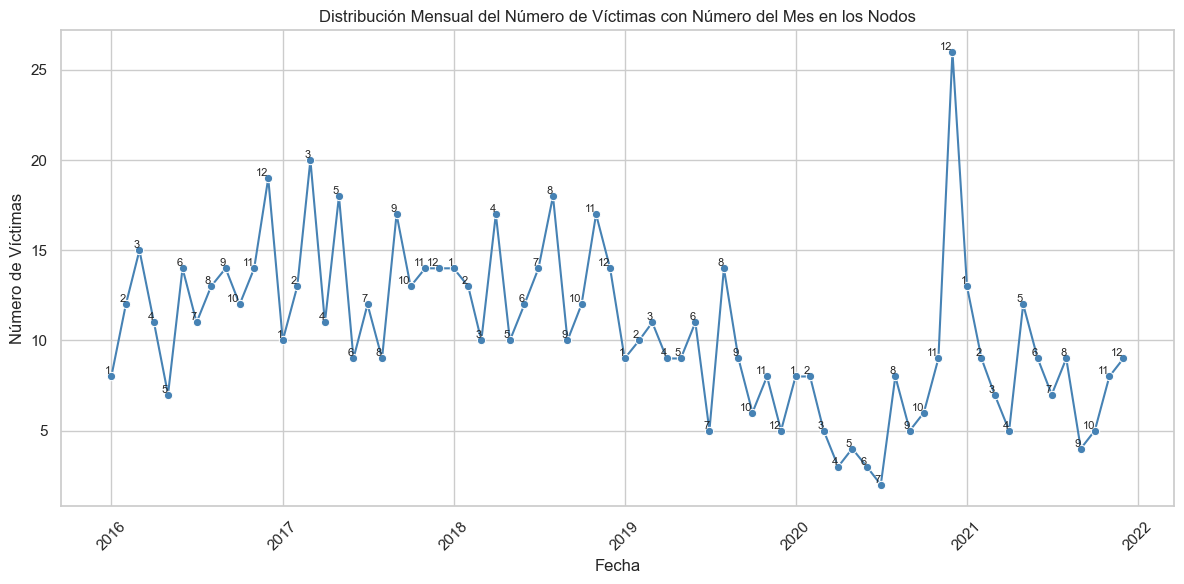

In [570]:
# Agrupar por año y mes, y se suma el número de víctimas.
año_mes = df_combinado.groupby(['Año', 'Mes'])['Número De Víctimas'].sum().reset_index()

# se crea una nueva columna "Fecha" combinando las columnas "Año" y "Mes".
año_mes["Fecha"] = año_mes["Año"].astype(str) + '-' + año_mes["Mes"].astype(str)

# Se convierte formato datetime.
año_mes["Fecha"] = pd.to_datetime(año_mes["Fecha"])

# Se ordena por fecha.
año_mes = año_mes.sort_values("Fecha")

# Crear un gráfico de líneas para la distribución mensual del número de víctimas.
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='Número De Víctimas', data=año_mes, marker='o', color='steelblue')

# Añadir etiquetas a cada nodo (punto) con el número del mes.
for i, row in tiempo.iterrows():
    plt.text(row['Fecha'], row['Número De Víctimas'], f"{row['Mes']}", ha='right', va='bottom', fontsize=8)

# Añadir títulos y etiquetas.
plt.title('Distribución Mensual del Número de Víctimas con Número del Mes en los Nodos')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')

# Rotar las etiquetas del eje x para mejor legibilidad.
plt.xticks(rotation=45)

# Se muestra el gráfico.
plt.tight_layout()
plt.show()

<div style="text-align: justify">
Se evidencia que la pandemia por COVID 19 fue un factor determinante para reducir el numero de homicidios por accidente de transito pero se dispara cuando se comienzan a levantar las restricciones.
</div>

<div style="text-align: justify">

### Analizando los homicidios por Mes.

Se logra evidenciar que el mes con mas accidentes es Diciembre y el mas bajo es el mes de Julio.
</div>

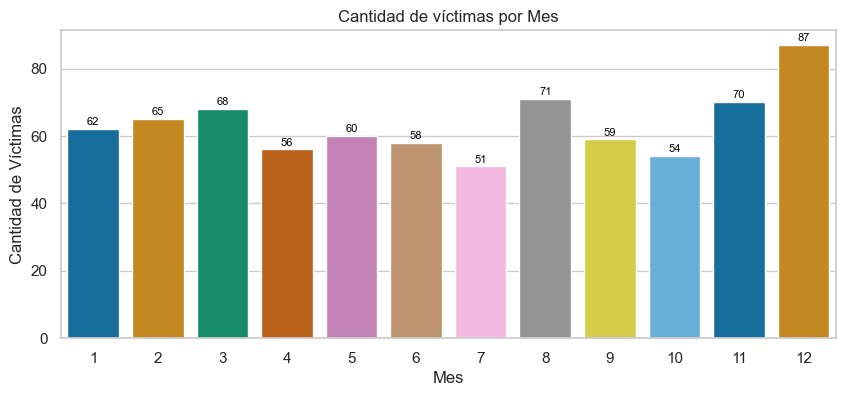

In [571]:
# Agrupar por mes y sumar el número de víctimas.
solo_mes = df_combinado.groupby(['Mes'])['Número De Víctimas'].sum().reset_index()

# Se crea gráfico.
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Mes', y='Número De Víctimas', data=solo_mes, hue='Mes', palette="colorblind", legend=False)
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Víctimas')

# añadir la cantidad de victimas por mes a cada barra.
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico.
plt.show()

<div style="text-align: justify">

### Analizando los homicidios por Dia.

Se logra evidenciar que el dia con mas homicidios es el dia 20 que en los últimos años han habido muchos fines de semana que caen ese dia. por otro lado el dia 31 es el dia con menos homicidios ya que solo 7 meses del año tienen ese dia y muchas veces cae entre semana.
</div>

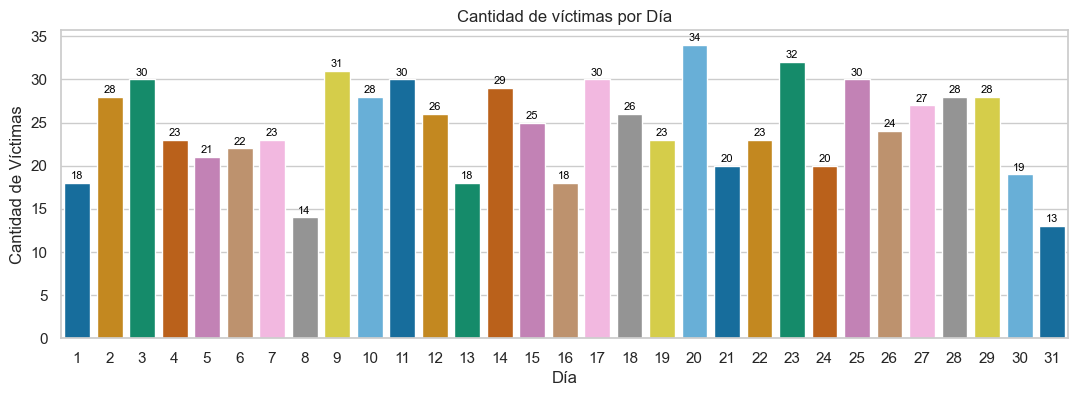

In [572]:
# Se agrupa por la cantidad de víctimas por día.
solo_dia = df_combinado.groupby(['Día'])['Número De Víctimas'].sum().reset_index()
solo_dia["Día"] = solo_dia["Día"].astype("str")  # Convertir a tipo string

# Se grafica.
plt.figure(figsize=(13, 4))

ax = sns.barplot(x='Día', y='Número De Víctimas', data=solo_dia, hue='Día', palette="colorblind", legend=False)
ax.set_title('Cantidad de víctimas por Día')
ax.set_xlabel('Día')
ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra.
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico.
plt.show()

<div style="text-align: justify">

### Creando las columnas Día Semana y Código Día

Convirtiendo la columna Fecha a formato datetime para extraer el nombre del dia de la semana y se crea Se crea la columna que contiene el orden de los días de la semana.
</div>

In [535]:
# Convierte la columna 'Fecha' a formato datetime utilizando la función pd.to_datetime.
# Esto asegura que la columna 'Fecha' esté representada como objetos datetime en lugar de cadenas de texto.
df_combinado['Fecha'] = pd.to_datetime(df_combinado['Fecha'])
# Se extrae el día de la semana (0 = lunes, 6 = domingo).
df_combinado['Código Día'] = df_combinado['Fecha'].dt.dayofweek
# Se mapea el número del día de la semana a su nombre.
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df_combinado['Día Semana'] = df_combinado['Código Día'].map(lambda x: dias_semana[x])

<div style="text-align: justify">

### Analizando los Homicidios por día de la semana

Se evidencia que los los Días viernes, sábado y domingos son los Días con mas accidentes fatales.
</div>

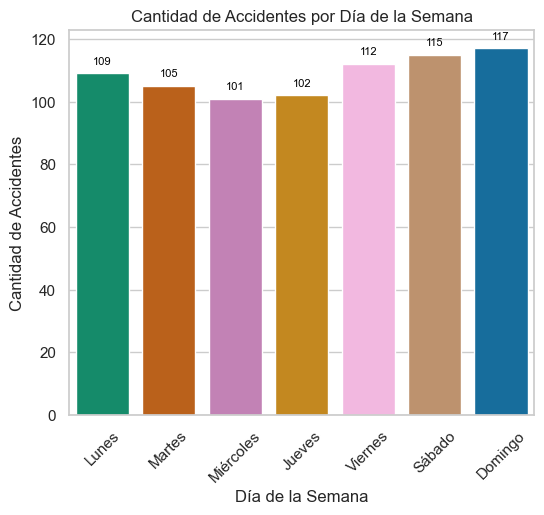

In [573]:
# Se cuenta la cantidad de accidentes por día de la semana.
dia_semana = df_combinado.groupby('Día Semana').agg({'Número De Víctimas':'sum'}).reset_index()

# Se crea el gráfico de barras con colores.
plt.figure(figsize=(6, 5))
ax = sns.barplot(x='Día Semana', y='Número De Víctimas', data=dia_semana, order=dias_semana, hue='Día Semana', dodge=False, palette='colorblind', legend=False)

ax.set_title('Cantidad de Accidentes por Día de la Semana')
ax.set_xlabel('Día de la Semana')
ax.set_ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)

# Agregar etiquetas de número de víctimas en cada barra.
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico.
plt.show()

<div style="text-align: justify">

### Creando la columna Franja Horaria

Se crea la columna franja horaria para visualizar el momento del dia donde ocurren mas homicidios por accidentes.
</div>

In [542]:
# Se crea la función momento_dia para clasificar los datos de la columna Hora.
def momento_dia(hora):
    if hora.hour >= 6 and hora.hour <= 11:
        return "Mañana"
    elif hora.hour >= 12 and hora.hour <= 17:
        return "Tarde"
    elif hora.hour >= 18 and hora.hour <= 23:
        return "Noche"
    else:
        return "Madrugada"
    
# Convierte la columna 'Hora' a formato datetime utilizando la función pd.to_datetime.
# La opción 'errors='coerce'' trata de manejar errores de conversión asignando NaT (Not a Time) 
# a los valores no válidos.
df_combinado['Hora'] = pd.to_datetime(df_combinado['Hora'], errors='coerce') 
# Aplica la función 'momento_dia' a la columna 'Hora' para crear una nueva columna 'Franja Horaria' 
# que representa la categoría del momento del día.
df_combinado['Franja Horaria'] = df_combinado['Hora'].apply(momento_dia)

<div style="text-align: justify">

### Analizando los homicidios por momento del día

Se evidencia que el momento del día con mas accidentes es por la mañana. quizás esto se deba a que es cuando mas gente sale a trabajar y estudiar adicionalmente dentro de ese momento del dia también puede estar la gente que llega de las discotecas amanecidos.
</div>

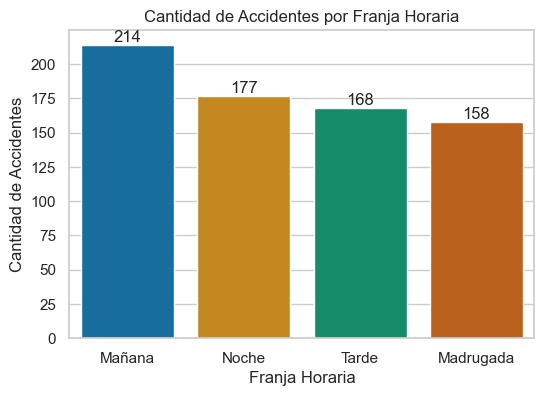

In [574]:
# Se cuenta la cantidad de accidentes por categoría de tiempo.
franja_horaria = df_combinado['Franja Horaria'].value_counts().reset_index()
franja_horaria.columns = ['Franja Horaria', 'Cantidad accidentes']

# Se calculan los porcentajes.
total_accidentes = franja_horaria['Cantidad accidentes'].sum()
franja_horaria['Porcentaje'] = (franja_horaria['Cantidad accidentes'] / total_accidentes) * 100

# Se crea el gráfico de barras con la paleta de colores 'colorblind'.
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Franja Horaria', y='Cantidad accidentes', data=franja_horaria, hue='Franja Horaria', palette='colorblind', dodge=False, legend=False)

ax.set_title('Cantidad de Accidentes por Franja Horaria')
ax.set_xlabel('Franja Horaria')
ax.set_ylabel('Cantidad de Accidentes')

# Se agrega las cantidades en las barras.
for index, row in franja_horaria.iterrows():
    ax.annotate(f'{row["Cantidad accidentes"]}', (index, row["Cantidad accidentes"]), ha='center', va='bottom')

# Se muestra el gráfico.
plt.show()

<div style="text-align: justify">

### Analizando los homicidios por hora del día

Las horas con las accidentes fatales son entre las 5 A.M. y las 7 A.M. momento donde la gente sale a trabajar o estudiar. La hora con menos accidentes es la 1 P.M. muy seguramente por que la gente almuerza en sus lugares de trabajo o cerca al trabajo.
</div>

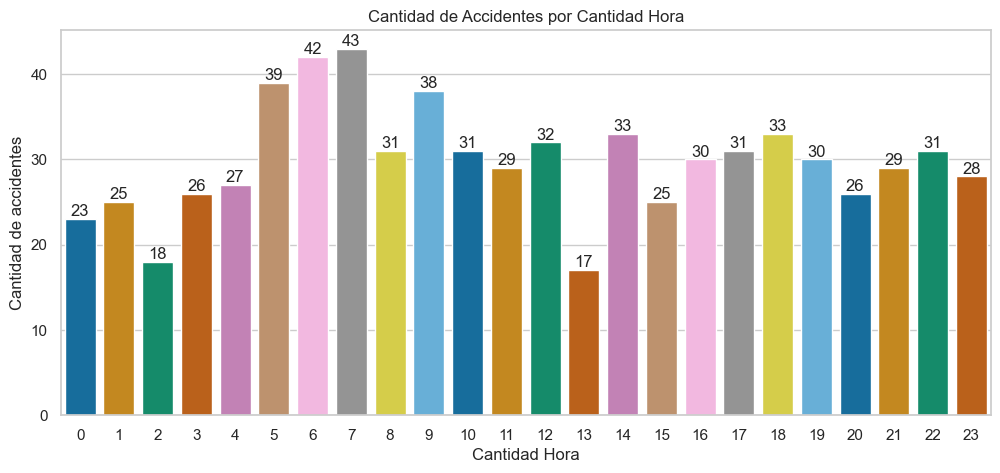

In [575]:
# Se cuenta la cantidad de accidentes por hora del día.
hora_dia = df_combinado['Cantidad Hora'].value_counts().reset_index()
hora_dia.columns = ['Cantidad Hora', 'Cantidad de accidentes']

# Se ordenan los datos por cantidad de hora.
hora_dia = hora_dia.sort_values(by='Cantidad Hora')

# Se crea el gráfico de barras asignando 'Cantidad Hora' a 'hue' y desactivando la leyenda.
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='Cantidad Hora', y='Cantidad de accidentes', data=hora_dia, hue='Cantidad Hora', palette='colorblind', dodge=False, legend=False)

ax.set_title('Cantidad de Accidentes por Cantidad Hora')
ax.set_xlabel('Cantidad Hora')
ax.set_ylabel('Cantidad de accidentes')

# Se agregan las cantidades en las barras.
for index, row in hora_dia.iterrows():
    ax.annotate(f'{row["Cantidad de accidentes"]}', (row["Cantidad Hora"], row["Cantidad de accidentes"]), ha='center', va='bottom')

# Se muestra el gráfico.
plt.show()

<div style="text-align: justify">

### Analizando la edad de las víctimas

Se observa que la edad minima de las victimas es de 1 año y la edad maxima es de 95 años, la mediana de edad de las victimas es de 39 años, también se puede observar que el 75% de las victimas es menor de 55 años.
</div>

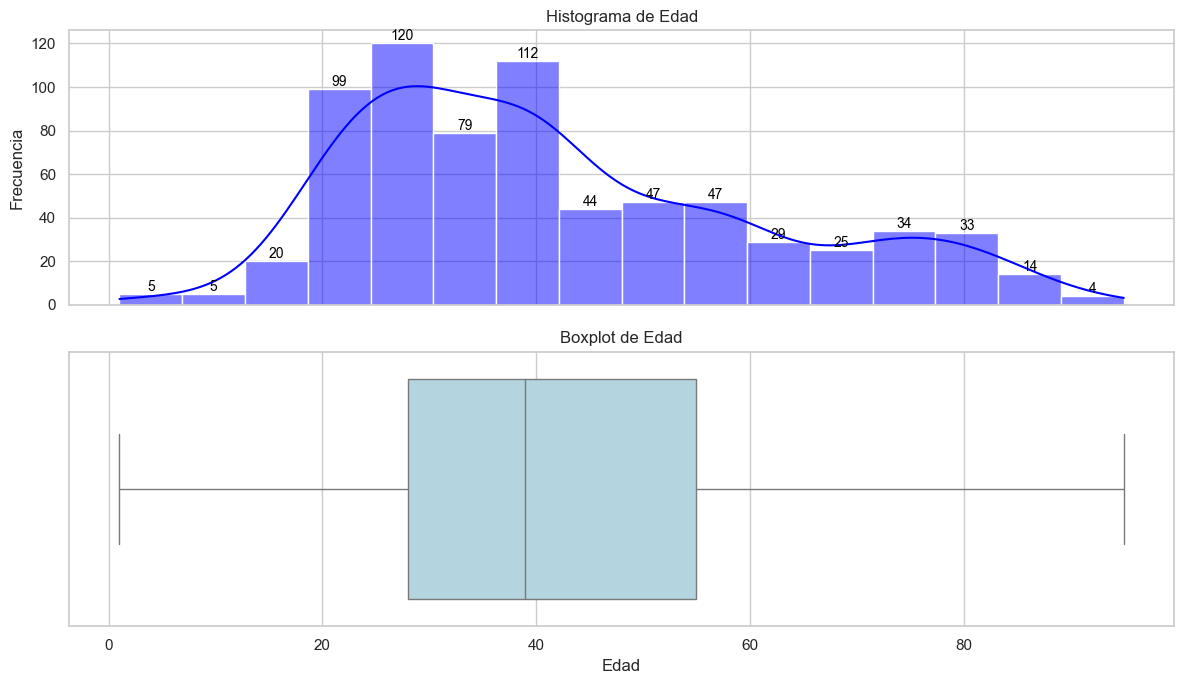

In [591]:
# Configuración de estilo de seaborn.
sns.set(style="whitegrid")

# Crear subplots.
fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

# Histograma de la Edad con colores.
histplot = sns.histplot(df_combinado['Edad'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histograma de Edad')
axes[0].set_ylabel('Frecuencia')

# Boxplot de la Edad con colores.
boxplot = sns.boxplot(x=df_combinado['Edad'], color='lightblue', ax=axes[1])
axes[1].set_title('Boxplot de Edad')
axes[1].set_xlabel('Edad')

# Agregar etiquetas de datos en el histograma.
for i in histplot.patches:
    histplot.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),
                      ha='center', va='bottom', fontsize=10, color='black')

# Ajustar y mostrar el gráfico.
plt.tight_layout()
plt.show()

<div style="text-align: justify">

### Analizando la cantidad de homicidios por Año y Sexo

Se evidencia que en todos los años el sexo masculino predomina como la principal víctima de accidentes fatales. El año 2016 es el año con mayor cantidad de víctimas para los hombres y el año 2018 el peor año para las mujeres. Nuevamente se evidencia que el 2020 fue un año bajo debido a las restricciones del COVID 19.
</div>

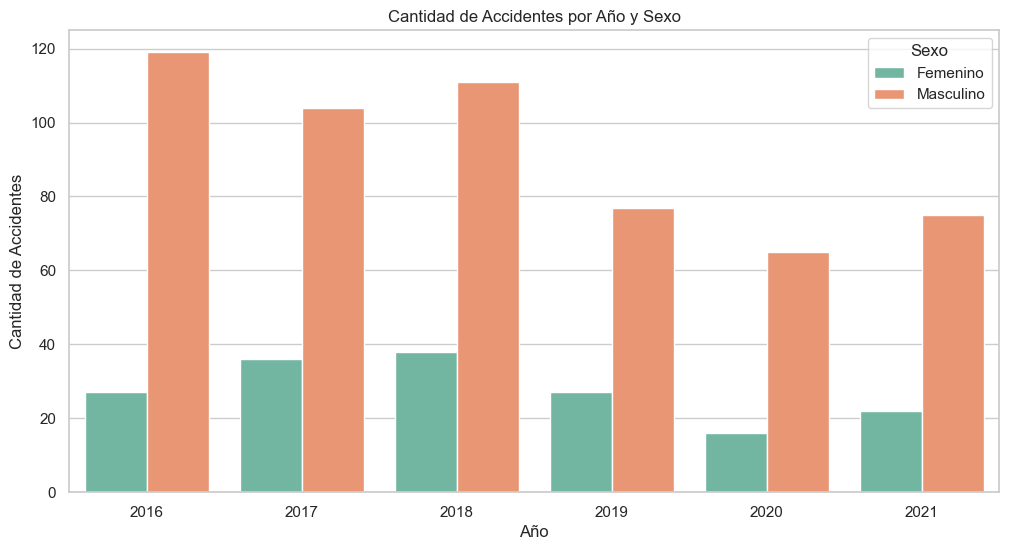

In [595]:
# Agrupa y calcula el tamaño de cada grupo y muestra las columnas 'Año' y 'Sexo'.
sexo_año = df_combinado.groupby(['Año', 'Sexo']).size().reset_index(name='Cantidad Accidentes')

# Crear el gráfico de barras agrupado usando las columnas Año y Cantidad Accidentes.
plt.figure(figsize=(12, 6))
sns.barplot(x='Año', y='Cantidad Accidentes', hue='Sexo', data=sexo_año, palette='Set2')

# Configurar etiquetas y título.
plt.title('Cantidad de Accidentes por Año y Sexo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')

# Mostrar el gráfico.
plt.show()

In [594]:
df_combinado.columns

Index(['Id', 'Número De Víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora',
       'Cantidad Hora', 'Lugar Del Hecho', 'Tipo De Calle', 'Calle', 'Cruce',
       'Dirección Normalizada', 'Comuna', 'Coordenadas XY (CABA)', 'Pos X',
       'Pos Y', 'Participantes', 'Víctima', 'Acusado', 'Rol', 'Sexo', 'Edad',
       'Barrios', 'Código Día', 'Día Semana', 'Franja Horaria'],
      dtype='object')

<div style="text-align: justify">

### Analizando la distribución de edades por rol

Se Evidencia que la mediana para los conductores y acompañantes es similar, ya que ronda los 30 años de edad. por otro lado se mira que la mediana de edad para los peatones y ciclistas es mas alta, siendo de 55 y 41 años respectivamente. se evidencian valores atípicos en los datos del conductor y del acompañante pero no son edad fuera de lo normal, los peatones tiene un mayor rango de edades.
</div>

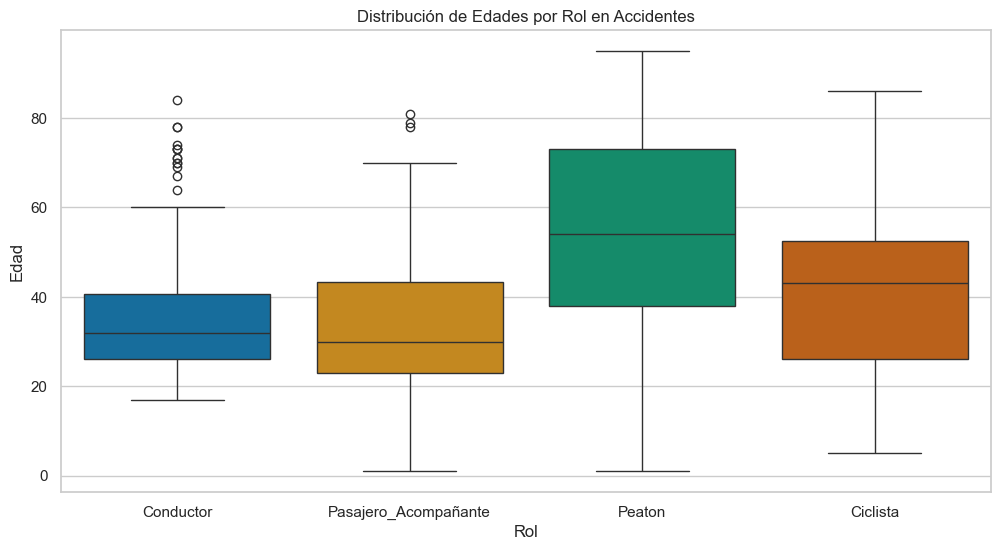

In [559]:
# Se crea el gráfico con colores diferentes para cada categoría de Rol.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rol', y='Edad', data=df_combinado, palette='colorblind', dodge=False, showfliers=True, hue='Rol', legend=False)

# Configurar etiquetas y título.
plt.title('Distribución de Edades por Rol en Accidentes')
plt.xlabel('Rol')
plt.ylabel('Edad')

# Mostrar el gráfico.
plt.show()

<div style="text-align: justify">

### Analizando las edades de las victimas por tipo de vehículo

Se evidencia que el peatón es el mas vulnerable ya que cuenta con mayor rango de edades, también se evidencia que moto tiene unos valores atípicos uno de ellos pasa los 80 años y a su vez tiene el grupo mas joven de victimas mientras que pasajeros presenta el grupo mas viejo de victimas pero con un valor atípico de 20 años.
</div>

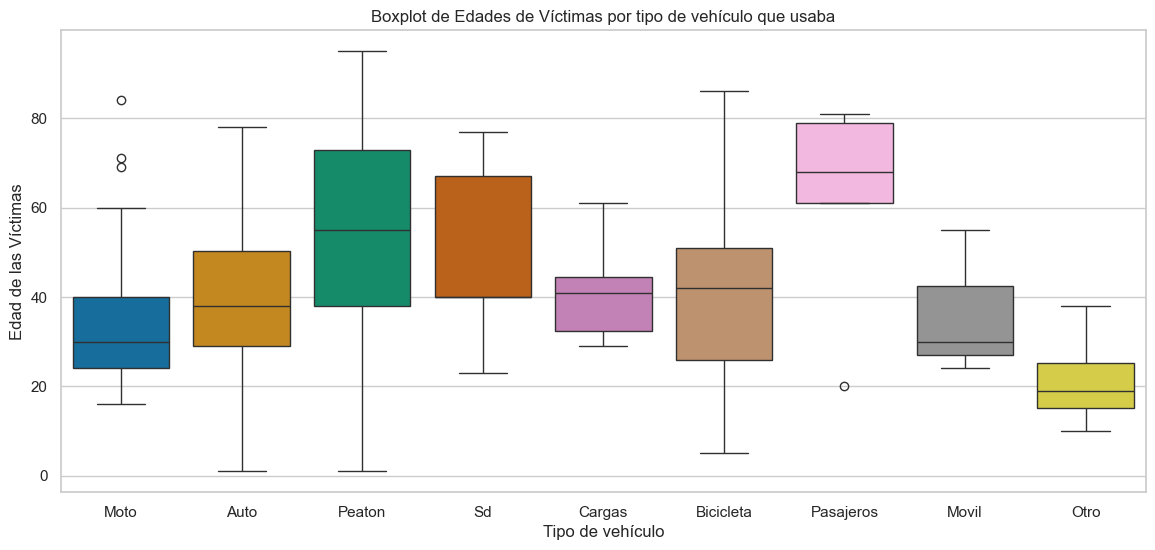

In [560]:
# Crea una figura de tamaño (14, 6) para el gráfico de caja (boxplot).
plt.figure(figsize=(14, 6))

# Crea un gráfico de caja (boxplot) utilizando Seaborn con Víctima y Edad.
# 'showfliers=True' muestra los valores atípicos.
sns.boxplot(x='Víctima', y='Edad', data=df_combinado, hue='Víctima', palette='colorblind', showfliers=True, dodge=False, legend=False)

# Configura el título y las etiquetas de los ejes.
plt.title('Boxplot de Edades de Víctimas por tipo de vehículo que usaba')
plt.xlabel('Tipo de vehículo')
plt.ylabel('Edad de las Víctimas')

# Muestra el gráfico.
plt.show()

<div style="text-align: justify">

### Analizando numero de victimas por barrio.

Se evidencia que la comuna 1 que comprende los barrios de Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y constitución es la comuna con mas victimas, mientras que la comuna 5 que comprende los barrios de Almagro y Boedo son las comuna con menos victimas. las comunas 1,4,9,8,7 albergan la mayor cantidad de victimas lo que nos sugiere que son barrios con vias importantes para la movilidad en la ciudad.
</div>

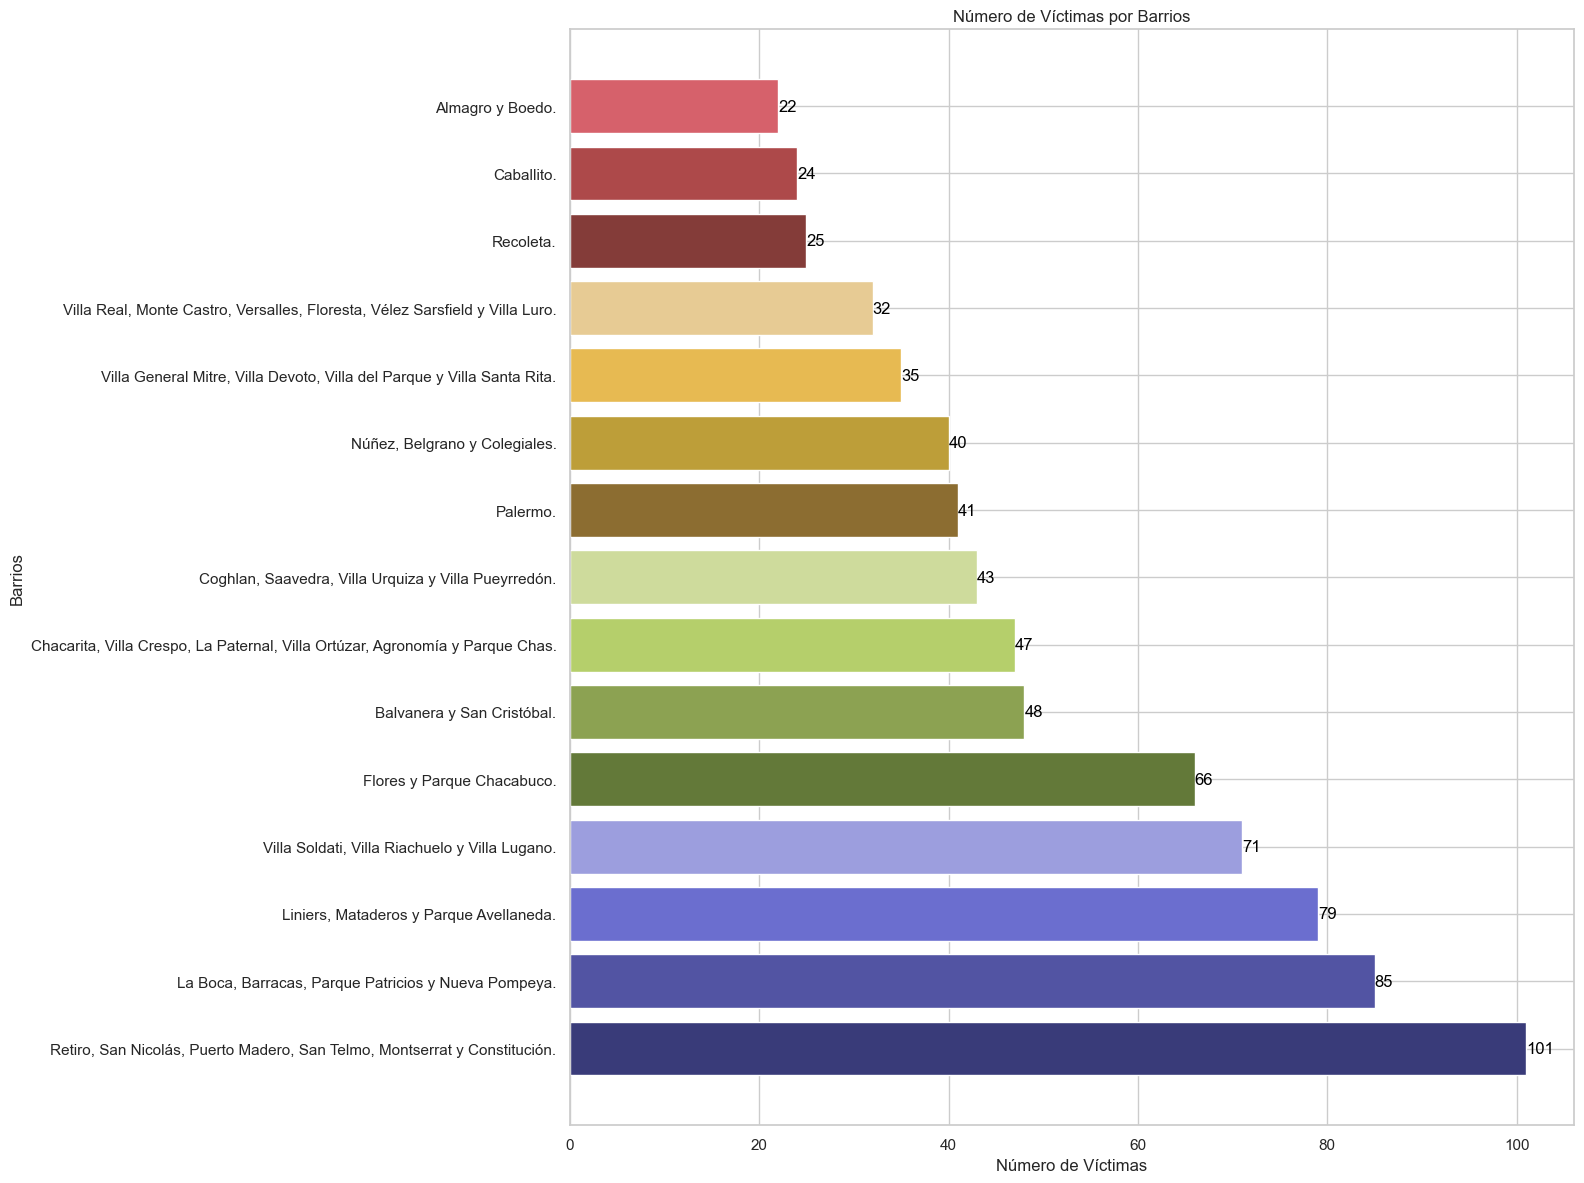

In [561]:
# Se crea un dataset con el número de víctimas por Comuna y Barrios.
barrios_comuna = df_combinado.groupby(["Comuna", "Barrios"])["Número De Víctimas"].sum().reset_index()
barrios_comuna = barrios_comuna.sort_values(by="Número De Víctimas", ascending=False)

# Crear el gráfico de barras horizontales.
plt.figure(figsize=(16, 12))

# Colores para las barras.
colores = plt.cm.tab20b(range(len(barrios_comuna)))

# Dibujar las barras horizontales.
plt.barh(barrios_comuna["Barrios"], barrios_comuna["Número De Víctimas"], color=colores)

# Etiquetas de eje x e y.
plt.xlabel('Número de Víctimas')
plt.ylabel('Barrios')

# Título del gráfico.
plt.title('Número de Víctimas por Barrios')

# Agregar el número de víctimas sobre cada barra.
for i, v in enumerate(barrios_comuna["Número De Víctimas"]):
    plt.text(v, i, str(v), va='center', fontsize=12, color='black')

# Muestra el gráfico.
plt.tight_layout()
plt.show()

<div style="text-align: justify">

### Analizando las víctimas por tipo de calle y cruce.

Se evidencia que el principal tipo de calle donde se producen accidentes son las avenidas y en segundo lugar las calles.
</div>

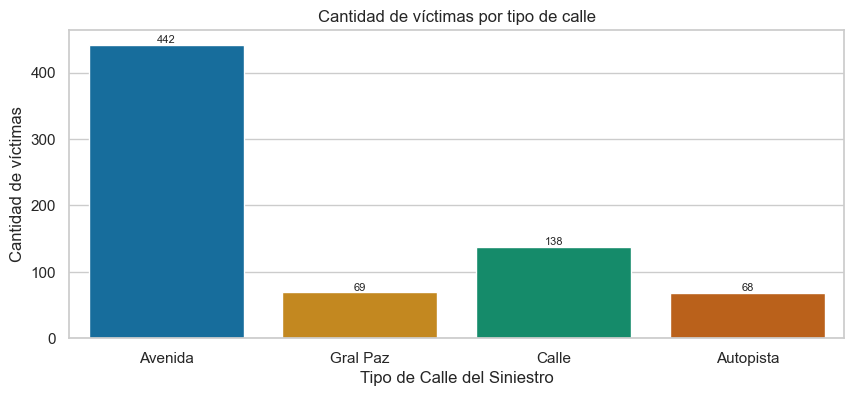

In [578]:
# Se crea el gráfico de barras usando Tipo De Calle.
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df_combinado, x='Tipo De Calle', hue='Tipo De Calle', palette="colorblind", dodge=False, legend=False)

# Agrega el número de víctimas (convertido a int) en las barras.
for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='bottom', fontsize=8)

# Se titulan los ejes.
plt.xlabel('Tipo de Calle del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas por tipo de calle')

# Muestra el gráfico.
plt.show()

<div style="text-align: justify">
Cuando analizamos lo anterior vimos que las avenidas y las calles presentan la mayor cantidad de víctimas, esto se correlaciona con la gráfica de cruce la cual nos muestra que 75.31% de las victimas se produce en estos lugares.
</div>

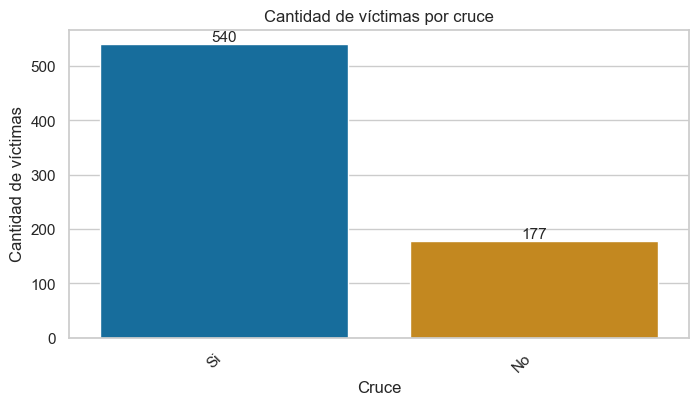

In [579]:
# Se crea el gráfico de barras agrupadas usando la Columna Cruce.
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df_combinado, x='Cruce', hue='Cruce', palette='colorblind', order=df_combinado['Cruce'].value_counts().index, dodge=False, legend=False)

# Agrega el número de víctimas (convertido a int) sobre cada barra.
for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='bottom', fontsize=11)

# Se titulan los ejes.
plt.xlabel('Cruce')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas por cruce')

# Rotar etiquetas del eje x para mejorar legibilidad.
plt.xticks(rotation=45, ha='right')  

# Muestra el gráfico.
plt.show()

<div style="text-align: justify">

### Analizando cantidad de víctimas según participantes

Se evidencia que la mayoría de las víctimas son por accidentes en los que se involucran peatones con pasajeros. En caso de que la víctima sea Peatón y el acusado sea Pasajero, es necesario tener en cuenta que el suceso se originó en relación a una persona que se dirigía, bajaba o se trasladaba por un medio de transporte público.
</div>

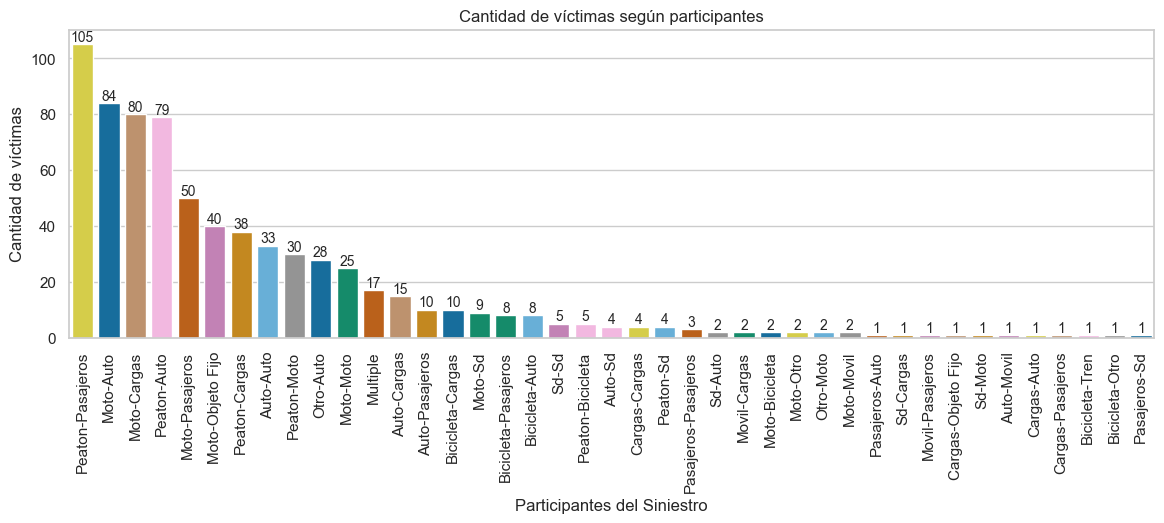

In [556]:
# Calcula el recuento de participantes y los organiza de mayor a menor
victimas_participantes = df_combinado['Participantes'].value_counts().sort_values(ascending=False)
orden_participantes = victimas_participantes.index

# Se crea el gráfico de barras usando la columna Participantes.
plt.figure(figsize=(14, 4))
ax = sns.countplot(data=df_combinado, x="Participantes", hue="Participantes", palette="colorblind", dodge=False, order=orden_participantes, legend=False)

# Agrega el número de víctimas (convertido a int) en las barras
for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='bottom', fontsize=10)

# Se ubican los títulos de las barras en 90 grados
plt.xticks(rotation=90)

# Se titulan los ejes
plt.xlabel('Participantes del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según participantes')

# Muestra el gráfico.
plt.show()

<div style="text-align: justify">

### Analizando las victimas según acusado

Se evidencia que el mayor causante de accidentes son los automóviles, seguido por los pasajeros, lo cual esta estrechamente relacionado con el punto anterior, seguramente hay muchos usuarios de transporte publico que no prestan atención al momento de decender de los diferentes transporte que tiene la ciudad, seguido por los vehículos de carga lo cual también tiene sentido por que son vehículos con poca visibilidad especialmente a los costados por donde muchos motociclistas transitan.
</div>

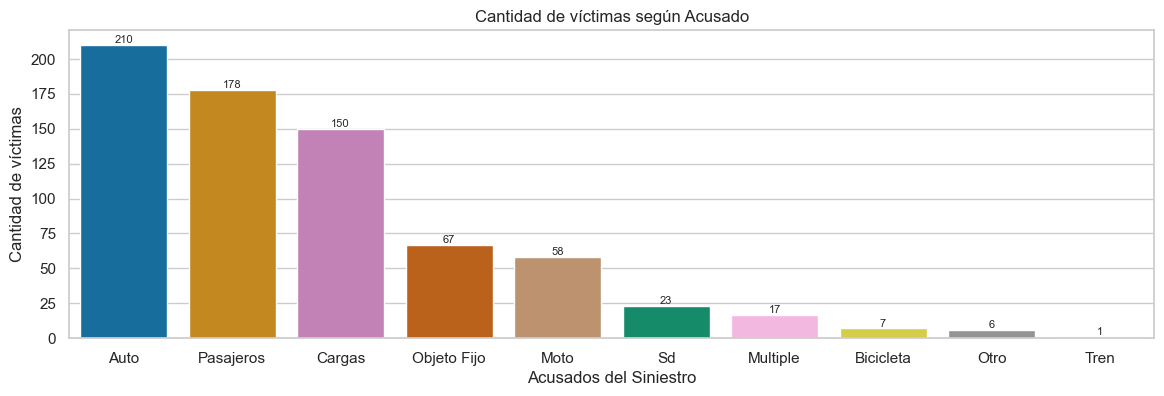

In [580]:
# Calcula el recuento de acusados y los organiza de mayor a menor.
victima_acusado = df_combinado['Acusado'].value_counts().sort_values(ascending=False)
orden_acusados = victima_acusado.index

# Se crea el gráfico de barras usando la columna Acusado.
plt.figure(figsize=(14, 4))
ax = sns.countplot(data=df_combinado, x="Acusado", hue="Acusado", palette="colorblind", dodge=False, order=orden_acusados, legend=False)

# Agrega el número de víctimas (convertido a int) en las barras.
for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='bottom', fontsize=8)

# Se titulan los ejes.
plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

# Muestra el gráfico.
plt.show()

In [596]:
# Se guarda el archivo en formato CSV.
df_combinado.to_csv('../proyecto/csv/homicidios_final.csv', index=False)